### **Step 1 : Import Necessary Libraries:**


---




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Step 2 : Load the Data**

---



In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data Analytics Project/IoT Network Intrusion Dataset.csv')
data

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding
625780,192.168.0.13-192.168.0.16-9020-52739-6,192.168.0.16,52739,192.168.0.13,9020,6,11/07/2019 01:29:09 AM,77,1,1,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,Anomaly,Scan,Scan Port OS
625781,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 05:00:29 AM,240,2,1,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,Normal,Normal,Normal


### **Step 3 : Data Exploration**

---



In [4]:
data.shape

(625783, 86)

In [5]:
data.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [6]:
data.isnull().sum().sum()

0

In [7]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
625778    False
625779    False
625780     True
625781    False
625782     True
Length: 625783, dtype: bool

In [8]:
data.nunique()

Flow_ID     64064
Src_IP      57985
Src_Port    11205
Dst_IP        478
Dst_Port     1034
            ...  
Idle_Max    11956
Idle_Min    10872
Label           2
Cat             5
Sub_Cat         9
Length: 86, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  int64  
 8   Tot_Fwd_Pkts       625783 non-null  int64  
 9   Tot_Bwd_Pkts       625783 non-null  int64  
 10  TotLen_Fwd_Pkts    625783 non-null  float64
 11  TotLen_Bwd_Pkts    625783 non-null  float64
 12  Fwd_Pkt_Len_Max    625783 non-null  float64
 13  Fwd_Pkt_Len_Min    625783 non-null  float64
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

In [10]:
data.describe(include="all")

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
count,625783,625783,625783.000000,625783,625783.000000,625783.000000,625783,625783.000000,625783.000000,625783.00000,...,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783,625783,625783
unique,64064,57985,NaN,478,NaN,NaN,4304,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5,9
top,192.168.0.13-192.168.0.16-56361-10101-17,192.168.0.13,NaN,192.168.0.13,NaN,NaN,25/07/2019 03:25:05 AM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anomaly,Mirai,Mirai-UDP Flooding
freq,51852,222096,NaN,164532,NaN,NaN,3189,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,585710,415677,183554
mean,NaN,NaN,35026.156190,NaN,16387.027479,9.971436,NaN,635.422865,1.675566,1.46853,...,0.353385,4.248735,3.462159,502.503832,52.403995,561.540512,467.264459,NaN,NaN,NaN
std,NaN,NaN,24721.047752,NaN,17550.363037,5.379857,NaN,3496.740723,4.309970,1.21949,...,20.723370,88.934148,64.111043,2112.957360,1153.184897,2866.497606,1931.909971,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,1.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,9020.000000,NaN,8899.000000,6.000000,NaN,76.000000,0.000000,1.00000,...,0.000000,0.000000,0.000000,73.000000,0.000000,74.000000,71.000000,NaN,NaN,NaN
50%,NaN,NaN,51991.000000,NaN,9020.000000,6.000000,NaN,132.000000,1.000000,1.00000,...,0.000000,0.000000,0.000000,93.500000,0.000000,114.000000,78.000000,NaN,NaN,NaN
75%,NaN,NaN,56361.000000,NaN,10101.000000,17.000000,NaN,221.000000,2.000000,2.00000,...,0.000000,0.000000,0.000000,141.000000,1.527525,154.000000,130.000000,NaN,NaN,NaN


In [11]:
data.duplicated().sum()

164087

In [12]:
TempData=data.copy()
TempData.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [13]:
TempData = TempData.drop_duplicates()
TempData

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625773,192.168.0.24-210.89.164.90-60165-8899-17,192.168.0.24,60165,210.89.164.90,8899,17,25/07/2019 03:21:00 AM,29,5,1,...,0.0,0.0,0.0,5.8,3.346640,11.0,3.0,Anomaly,Mirai,Mirai-UDP Flooding
625776,192.168.0.24-111.57.139.118-19604-8739-6,111.57.139.118,8739,192.168.0.24,19604,6,04/06/2019 11:44:26 PM,1092,0,2,...,0.0,0.0,0.0,1092.0,0.000000,1092.0,1092.0,Anomaly,DoS,DoS-Synflooding
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding


In [14]:
TempData.duplicated().sum()

0

In [15]:
OneUnique = TempData.nunique() == 1
VarRange1 = OneUnique[OneUnique == True]
VarRange1


Fwd_PSH_Flags        True
Fwd_URG_Flags        True
Fwd_Byts/b_Avg       True
Fwd_Pkts/b_Avg       True
Fwd_Blk_Rate_Avg     True
Bwd_Byts/b_Avg       True
Bwd_Pkts/b_Avg       True
Bwd_Blk_Rate_Avg     True
Init_Fwd_Win_Byts    True
Fwd_Seg_Size_Min     True
dtype: bool

In [16]:
ColumnsToDrop = ['Fwd_PSH_Flags','Fwd_URG_Flags','Fwd_Byts/b_Avg','Fwd_Pkts/b_Avg','Fwd_Blk_Rate_Avg'
,'Bwd_Byts/b_Avg','Bwd_Pkts/b_Avg','Bwd_Blk_Rate_Avg','Init_Fwd_Win_Byts','Fwd_Seg_Size_Min']

In [17]:
for col in ColumnsToDrop:
  del TempData[col]

In [18]:
TempData.shape

(461696, 76)

In [19]:
OneUniqueCheck = TempData.nunique() == 1
VarRange_1 = OneUniqueCheck[OneUniqueCheck == True]
VarRange_1

Series([], dtype: bool)

In [20]:
CommonColumns = TempData [['Active_Max', 'Bwd_IAT_Max', 'Bwd_Seg_Size_Avg', 'Fwd_IAT_Max','Fwd_Seg_Size_Avg',
                    'Idle_Max', 'PSH_Flag_Cnt', 'Pkt_Size_Avg', 'Subflow_Bwd_Byts', 'Subflow_Bwd_Pkts','Subflow_Fwd_Byts','Subflow_Fwd_Pkts',
                    'Label', 'Cat', 'Sub_Cat']]

<ipython-input-21-d3bdeb3916e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CommonColumns[CategoricalColumns]= CommonColumns[CategoricalColumns].apply(label_encoder.fit_transform)


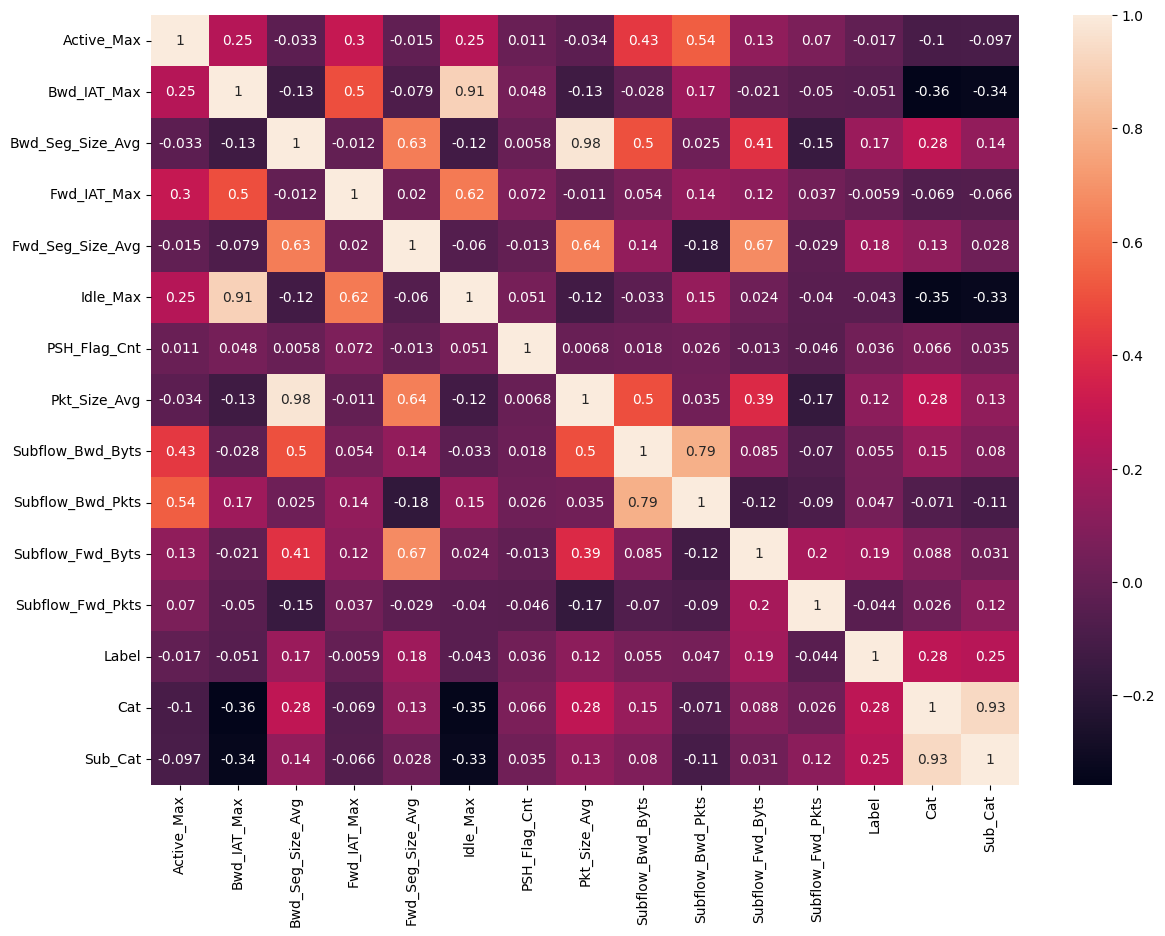

In [21]:
CategoricalColumns = ['PSH_Flag_Cnt','Label', 'Cat','Sub_Cat']
label_encoder = LabelEncoder()
CommonColumns[CategoricalColumns]= CommonColumns[CategoricalColumns].apply(label_encoder.fit_transform)
cor = CommonColumns.corr()
# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(cor, annot=True)
plt.show()

### **Step 4 : Filter Data for Common features**

---



In [22]:
SelectedColumns = ['Active_Max', 'Bwd_IAT_Max', 'Bwd_Seg_Size_Avg', 'Fwd_IAT_Max','Fwd_Seg_Size_Avg',
                    'Idle_Max', 'PSH_Flag_Cnt', 'Pkt_Size_Avg', 'Subflow_Bwd_Byts', 'Subflow_Bwd_Pkts','Subflow_Fwd_Byts','Subflow_Fwd_Pkts','Cat','Sub_Cat','Label']

In [23]:
CommonColumnsDF = TempData[SelectedColumns]
CommonColumnsDF

,Active_Max,Bwd_IAT_Max,Bwd_Seg_Size_Avg,Fwd_IAT_Max,Fwd_Seg_Size_Avg,Idle_Max,PSH_Flag_Cnt,Pkt_Size_Avg,Subflow_Bwd_Byts,Subflow_Bwd_Pkts,Subflow_Fwd_Byts,Subflow_Fwd_Pkts,Cat,Sub_Cat,Label
0,0.0,0.0,1430.000000,0.0,982.0,75.0,0,1921.000000,1430,1,982,1,Mirai,Mirai-Ackflooding,Anomaly
1,0.0,5310.0,0.000000,0.0,0.0,4254.0,0,0.000000,0,2,0,1,DoS,DoS-Synflooding,Anomaly
2,0.0,71.0,935.333333,0.0,0.0,71.0,0,1398.000000,2806,3,0,0,Scan,Scan Port OS,Anomaly
3,0.0,151.0,1388.000000,0.0,0.0,151.0,0,2082.000000,2776,2,0,0,Mirai,Mirai-Hostbruteforceg,Anomaly
4,0.0,0.0,420.000000,76.0,443.0,77.0,0,575.333333,420,1,886,2,Mirai,Mirai-Hostbruteforceg,Anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625773,0.0,0.0,32.000000,11.0,32.0,11.0,0,37.333333,32,1,160,5,Mirai,Mirai-UDP Flooding,Anomaly
625776,0.0,1092.0,0.000000,0.0,0.0,1092.0,0,0.000000,0,2,0,0,DoS,DoS-Synflooding,Anomaly
625778,0.0,0.0,18.000000,0.0,18.0,277.0,0,27.000000,18,1,18,1,Mirai,Mirai-UDP Flooding,Anomaly
625779,0.0,1658.0,0.000000,0.0,0.0,1658.0,0,0.000000,0,2,0,0,DoS,DoS-Synflooding,Anomaly


In [24]:
CommonColumnsDF.describe()

,Active_Max,Bwd_IAT_Max,Bwd_Seg_Size_Avg,Fwd_IAT_Max,Fwd_Seg_Size_Avg,Idle_Max,PSH_Flag_Cnt,Pkt_Size_Avg,Subflow_Bwd_Byts,Subflow_Bwd_Pkts,Subflow_Fwd_Byts,Subflow_Fwd_Pkts
count,461696.000000,461696.000000,461696.000000,461696.000000,461696.000000,461696.000000,461696.000000,461696.000000,461696.000000,461696.000000,461696.000000,461696.000000
mean,5.758360,647.366568,517.950915,109.171411,279.356115,721.018711,0.030566,737.903783,792.208967,1.486922,465.065394,1.940392
std,103.496667,3188.323288,641.743991,2252.859473,528.977047,3322.490376,0.172138,902.008965,1898.309952,1.357462,1167.705374,4.960794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,32.000000,0.000000,18.000000,112.000000,0.000000,48.000000,32.000000,1.000000,20.000000,1.000000
75%,0.000000,115.000000,1388.000000,7.000000,32.000000,175.000000,0.000000,1787.500000,1430.000000,2.000000,288.000000,2.000000
max,26785.000000,99973.000000,1460.000000,99600.000000,1464.000000,99973.000000,1.000000,2190.000000,773284.000000,560.000000,109846.000000,186.000000


In [25]:
# Checking for missing values
CommonColumnsDF.isnull().sum()

Active_Max          0
Bwd_IAT_Max         0
Bwd_Seg_Size_Avg    0
Fwd_IAT_Max         0
Fwd_Seg_Size_Avg    0
Idle_Max            0
PSH_Flag_Cnt        0
Pkt_Size_Avg        0
Subflow_Bwd_Byts    0
Subflow_Bwd_Pkts    0
Subflow_Fwd_Byts    0
Subflow_Fwd_Pkts    0
Cat                 0
Sub_Cat             0
Label               0
dtype: int64

In [26]:
# Data types of columns
CommonColumnsDF.dtypes

Active_Max          float64
Bwd_IAT_Max         float64
Bwd_Seg_Size_Avg    float64
Fwd_IAT_Max         float64
Fwd_Seg_Size_Avg    float64
Idle_Max            float64
PSH_Flag_Cnt          int64
Pkt_Size_Avg        float64
Subflow_Bwd_Byts      int64
Subflow_Bwd_Pkts      int64
Subflow_Fwd_Byts      int64
Subflow_Fwd_Pkts      int64
Cat                  object
Sub_Cat              object
Label                object
dtype: object

In [27]:
# Initialize empty lists to store the results
column_names = []
unique_counts = []
unique_values_list = []

# Loop through each column in the original DataFrame
for col in CommonColumnsDF.columns:
    unique_values = CommonColumnsDF[col].unique()
    count_unique = CommonColumnsDF[col].nunique()
    column_names.append(col)
    unique_counts.append(count_unique)
    unique_values_list.append(str(unique_values))  # Convert to string for easier storage and visualization

# Create a new DataFrame to store the above information
unique_info_df = pd.DataFrame({
    'Column_Name': column_names,
    'Unique_Count': unique_counts,
    'Unique_Values': unique_values_list
})

# Show the resulting DataFrame
unique_info_df

,Column_Name,Unique_Count,Unique_Values
0,Active_Max,1346,[0.000e+00 1.000e+00 8.980e+02 ... 1.239e+03 2...
1,Bwd_IAT_Max,12223,[ 0. 5310. 71. ... 46141. 30802. 6065.]
2,Bwd_Seg_Size_Avg,2583,[1430. 0. 935.33333333 ......
3,Fwd_IAT_Max,1793,[ 0. 76. 74. ... 25069. 652. 42089.]
4,Fwd_Seg_Size_Avg,2141,[ 982. 0. 443. ......
5,Idle_Max,11956,[ 75. 4254. 71. ... 42137. 30802. 6065.]
6,PSH_Flag_Cnt,2,[0 1]
7,Pkt_Size_Avg,5327,[1921. 0. 1398. ......
8,Subflow_Bwd_Byts,2612,[1430 0 2806 ... 2214 7040 4601]
9,Subflow_Bwd_Pkts,42,[ 1 2 3 7 5 4 9 8 6 10 144 ...


### **Step 5 : Filter Data for "Cat" Cases**

---



In [28]:
Dos_Attack = CommonColumnsDF[CommonColumnsDF['Cat'] == 'DoS']

Scan_Attack = CommonColumnsDF[CommonColumnsDF['Cat'] == 'Scan']

Mirai_Attack = CommonColumnsDF[CommonColumnsDF['Cat'] == 'Mirai']

MITM_ARP_Spoofing_Attack = CommonColumnsDF[CommonColumnsDF['Cat'] == 'MITM ARP Spoofing']

Normal = CommonColumnsDF[CommonColumnsDF['Cat'] == 'Normal']

### **Step 6 : Univariate Analysis**

---



**6.1 Numeric Variables**

In [29]:
NumericalCols = ['Active_Max', 'Bwd_IAT_Max', 'Bwd_Seg_Size_Avg', 'Fwd_IAT_Max', 'Fwd_Seg_Size_Avg', 'Idle_Max',
              'Pkt_Size_Avg', 'Subflow_Bwd_Byts', 'Subflow_Bwd_Pkts','Subflow_Fwd_Byts','Subflow_Fwd_Pkts']

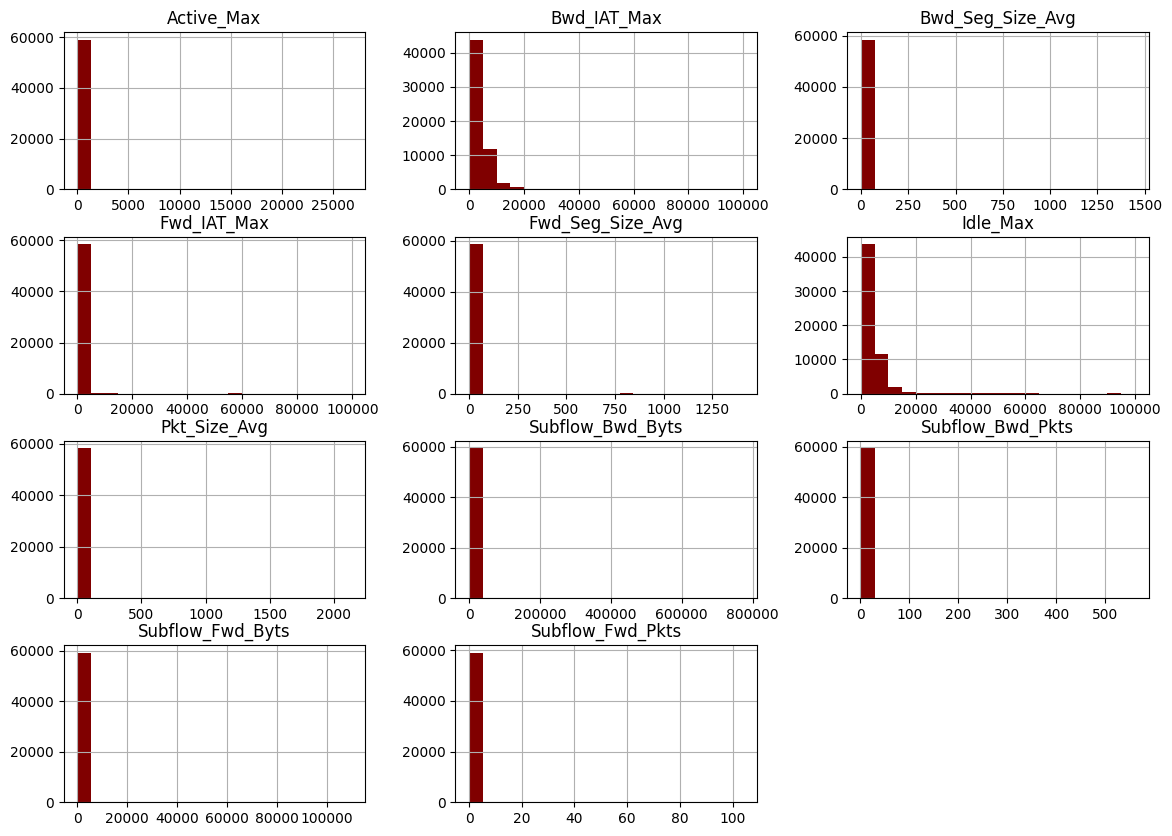

In [30]:
Dos_Attack[NumericalCols].hist(figsize=(14, 10), bins=20,color = 'maroon')
plt.show()

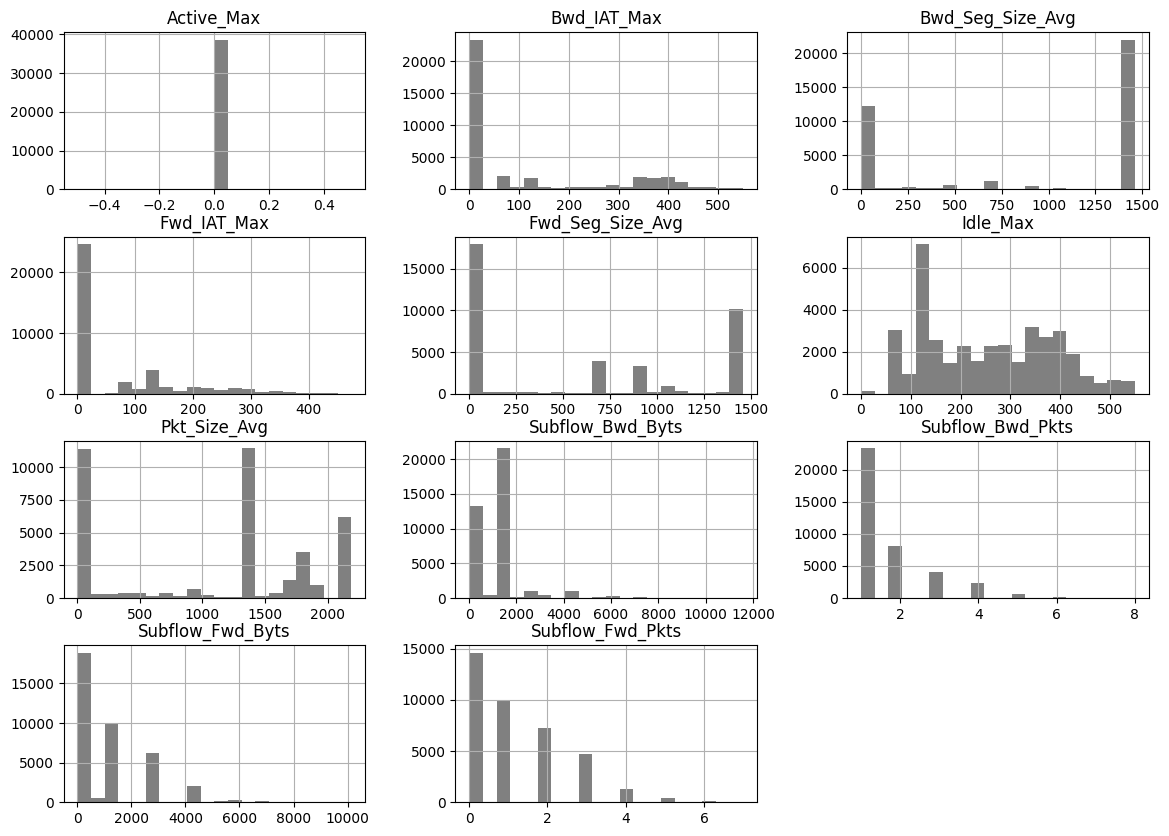

In [31]:
Normal[NumericalCols].hist(figsize=(14, 10), bins=20,color = 'Grey')
plt.show()

**6.2 Categorical Variables**

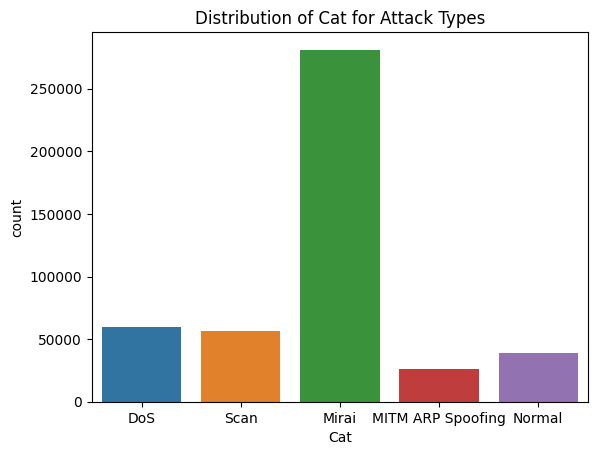

In [32]:
# Combine all attack types data into a single DataFrame
combined_data = pd.concat([Dos_Attack, Scan_Attack, Mirai_Attack, MITM_ARP_Spoofing_Attack, Normal])

# Specify the order of categories for the 'Cat' column
cat_order = ['DoS','Scan','Mirai' ,'MITM ARP Spoofing','Normal']

# Create a count plot for 'Cat' on a single plot
sns.countplot(x='Cat', data=combined_data, order=cat_order)
plt.title('Distribution of Cat for Attack Types')
plt.show()


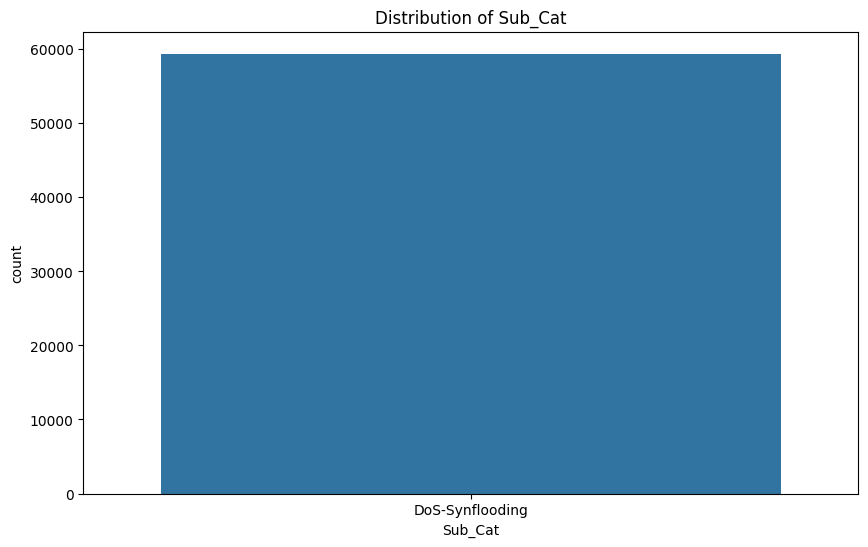

In [33]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Sub_Cat', data = Dos_Attack )
plt.title('Distribution of Sub_Cat')

# Show the count plot
plt.show()

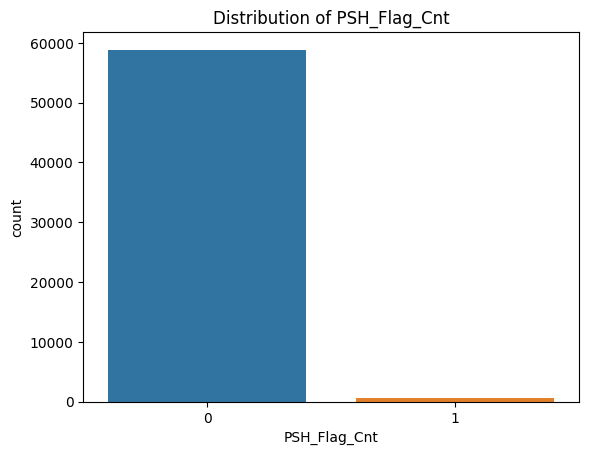

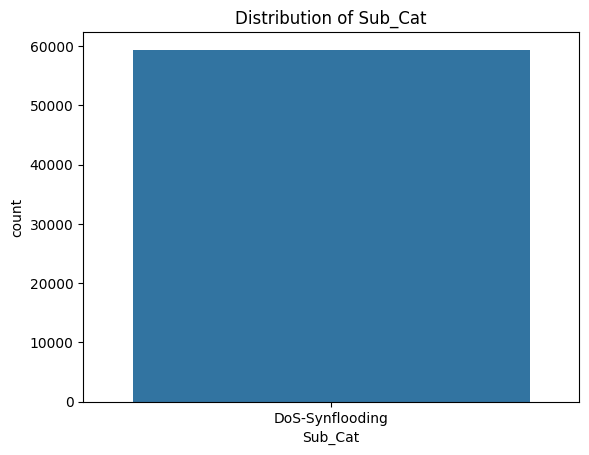

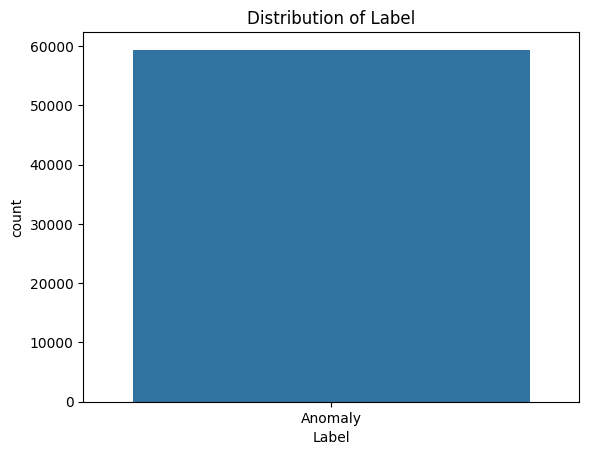

In [34]:
CategoricalCols = ['PSH_Flag_Cnt','Sub_Cat','Label']

for col in CategoricalCols:
    sns.countplot(x=col, data=Dos_Attack )
    plt.title('Distribution of ' +col)
    plt.show()

### **Step 7 : Bivariate Analysis**

---



**7.1 Boxplots for numerical variables**

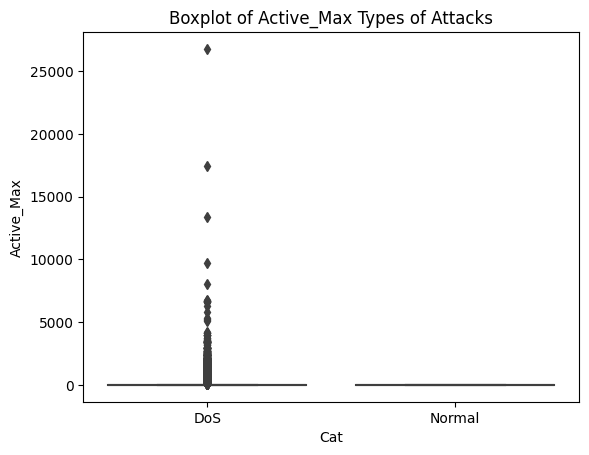

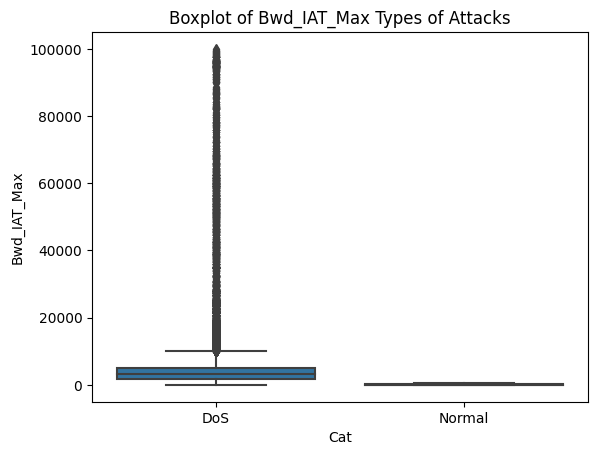

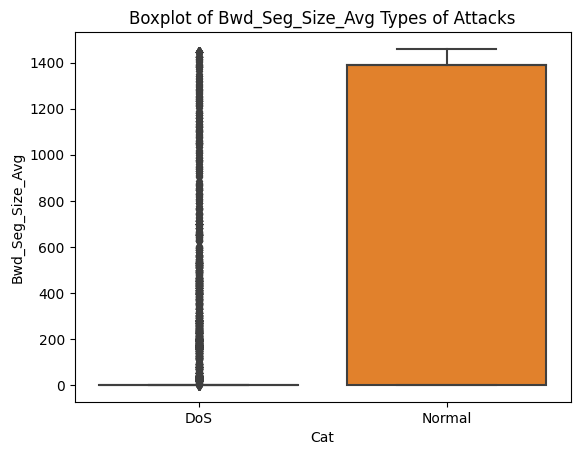

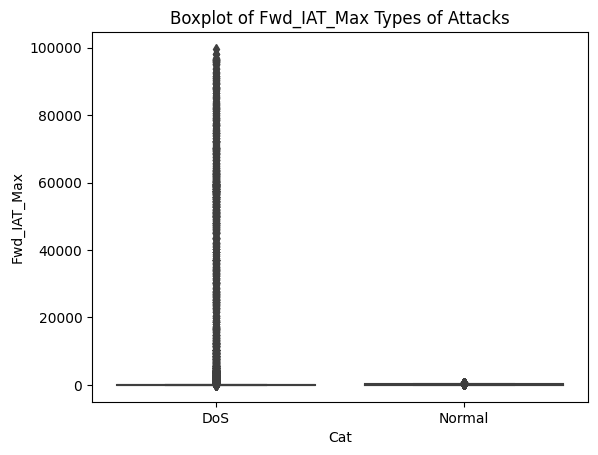

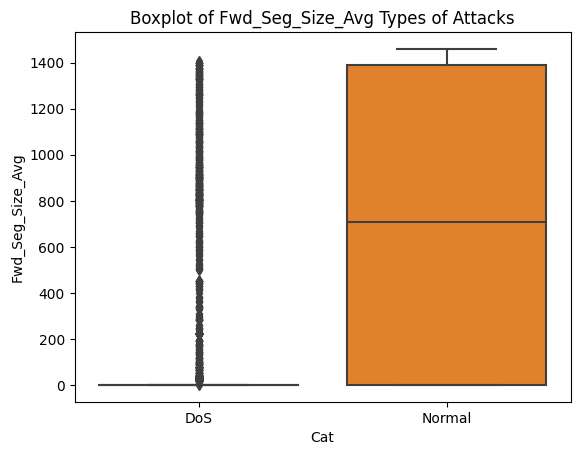

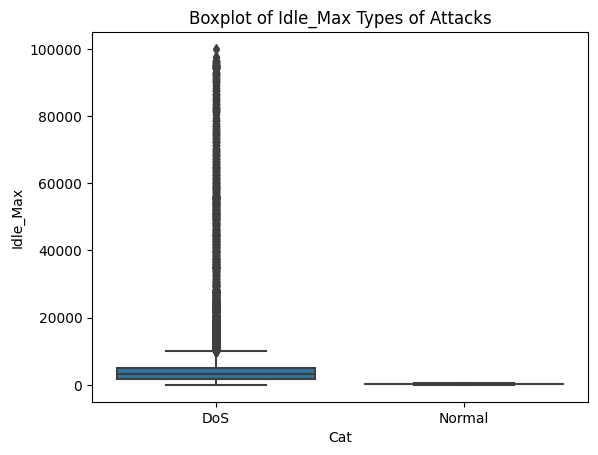

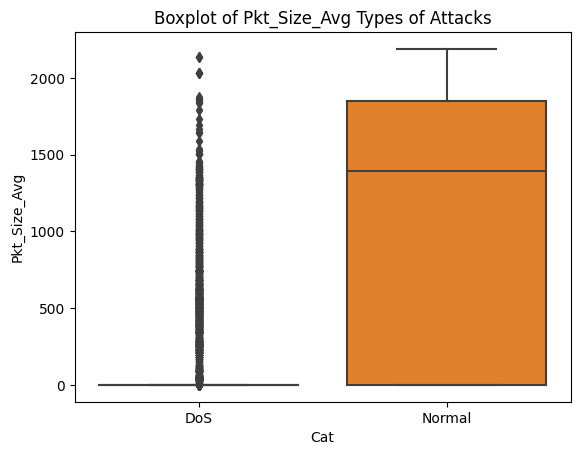

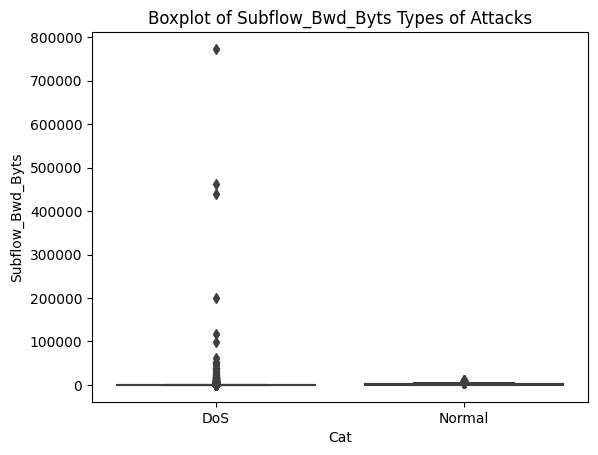

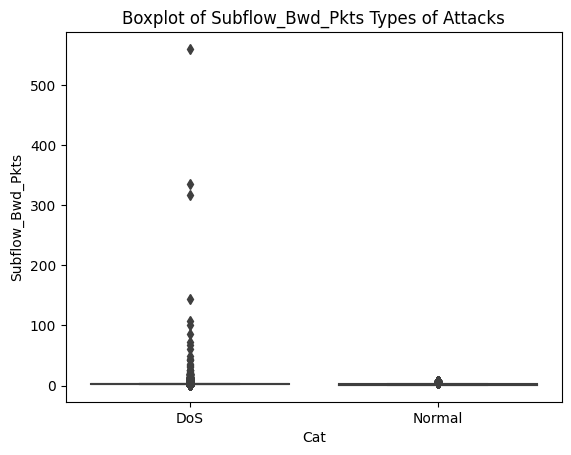

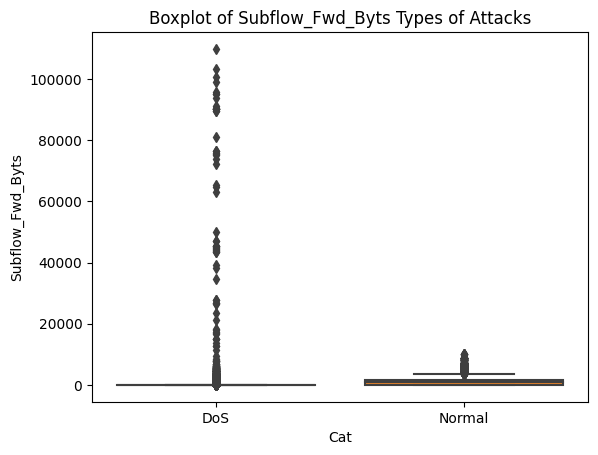

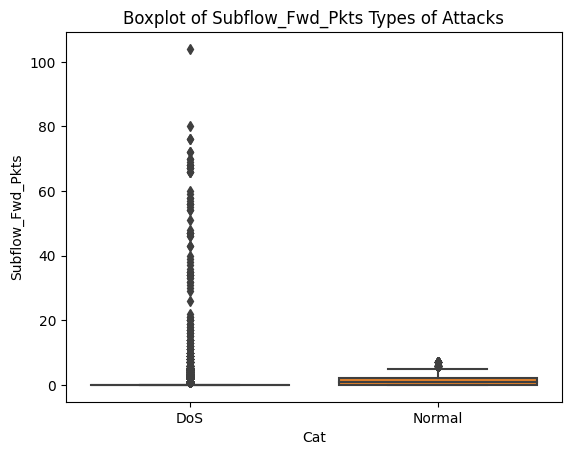

In [35]:
NumericalCols = ['Active_Max', 'Bwd_IAT_Max', 'Bwd_Seg_Size_Avg', 'Fwd_IAT_Max', 'Fwd_Seg_Size_Avg', 'Idle_Max',
              'Pkt_Size_Avg', 'Subflow_Bwd_Byts', 'Subflow_Bwd_Pkts','Subflow_Fwd_Byts','Subflow_Fwd_Pkts']
for col in NumericalCols:
    sns.boxplot(x='Cat', y=col, data=pd.concat([Dos_Attack , Normal]))
    plt.title('Boxplot of ' + col + ' Types of Attacks')
    plt.show()

**7.2 : Barplots for categorical variables**

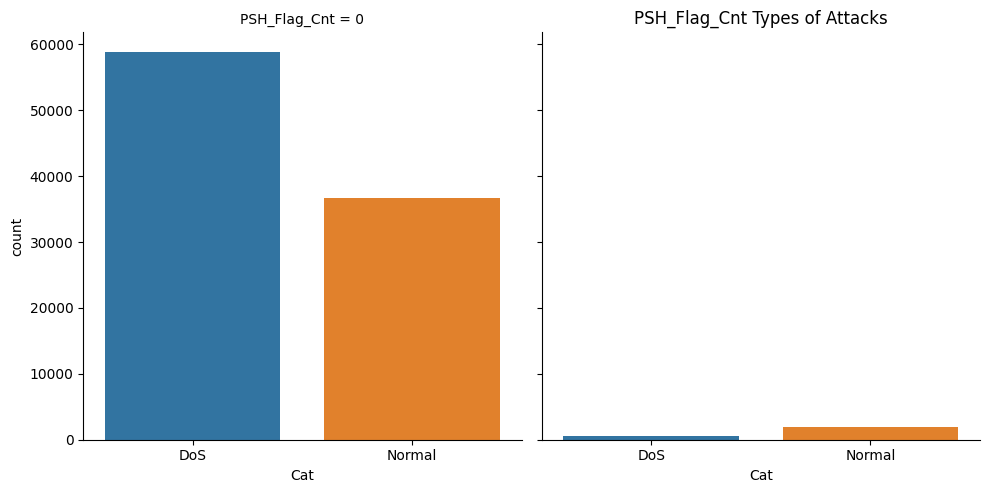

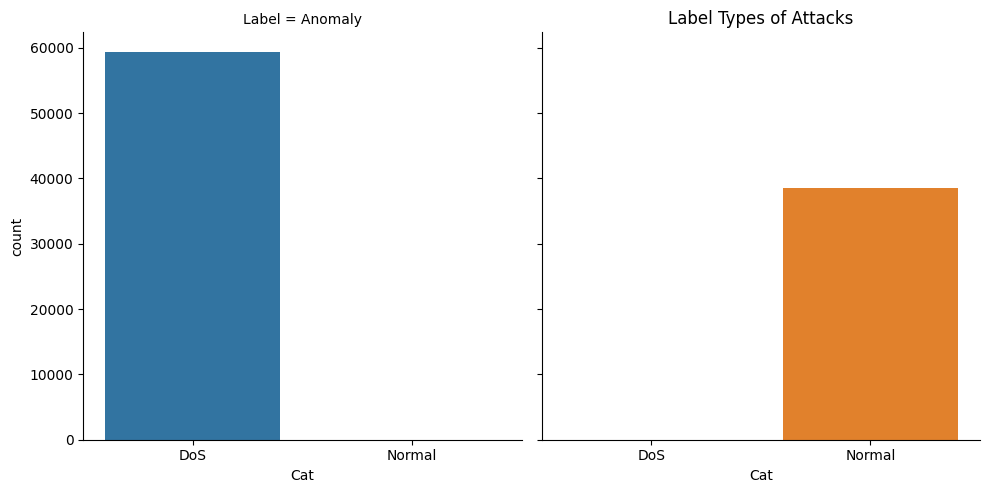

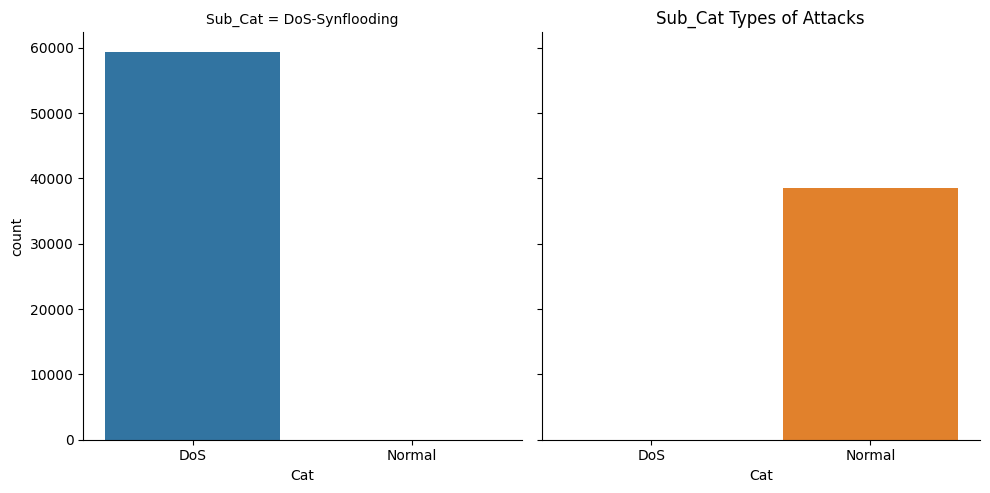

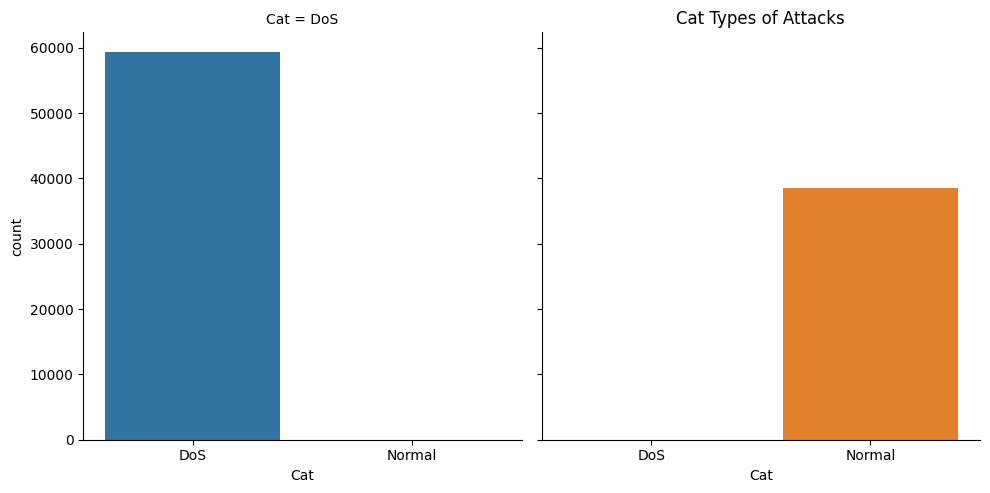

In [36]:
categorical_cols = ['PSH_Flag_Cnt','Label','Sub_Cat',"Cat"]

for col in categorical_cols:
    sns.catplot(x='Cat', col=col, kind='count', data=pd.concat([Dos_Attack , Normal]))
    plt.title(col +  ' Types of Attacks')
    plt.show()

### **Step 8 : Measure of Central Tendency**

---



In [37]:

# Define the columns you want to compute statistics for
NumericalCols = ['Active_Max', 'Bwd_IAT_Max', 'Bwd_Seg_Size_Avg', 'Fwd_IAT_Max', 'Fwd_Seg_Size_Avg', 'Idle_Max',
              'Pkt_Size_Avg', 'Subflow_Bwd_Byts', 'Subflow_Bwd_Pkts','Subflow_Fwd_Byts','Subflow_Fwd_Pkts']

# Define a list with all your dataframes and corresponding risk levels
dataframes = [
    ('Mirai', Mirai_Attack),
    ('DoS', Dos_Attack),
    ('Scan', Scan_Attack),
    ('Normal', Normal),
    ('MITM ARP Spoofing', MITM_ARP_Spoofing_Attack)
]

# Initialize a dictionary to store the resulting DataFrames for each risk level
statistics_dfs = {}

# Loop through all the dataframes and risk levels
for attack, df in dataframes:
    results = {}
    for col in NumericalCols:
        mean = df[col].mean()
        median = df[col].median()
        std_dev = df[col].std()
        min_val = df[col].min()
        max_val = df[col].max()
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        data_range = max_val - min_val
        mode = df[col].mode()[0]  # Taking the first mode value if there are multiple

        # Store the statistics in a dictionary
        results[col] = {
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Min': min_val,
            'Max': max_val,
            'Q1': q1,
            'Q3': q3,
            'IQR': iqr,
            'Range': data_range
        }

    # Convert the results dictionary to a DataFrame and store in the dictionary
    statistics_dfs[attack] = pd.DataFrame(results).transpose()

# Now, statistics_dfs will contain each statistics DataFrame, keyed by the attack names
# For example, to view the statistics DataFrame for 'Mirai', you can do:
print("Statistics for Dos Attack")
statistics_dfs['DoS']

Statistics for Dos Attack


,Mean,Median,Mode,Standard Deviation,Min,Max,Q1,Q3,IQR,Range
Active_Max,43.993955,0.0,0.0,285.638484,0.0,26785.0000,0.0,0.00,0.00,26785.0000
Bwd_IAT_Max,4782.184745,3194.0,0.0,7705.138871,0.0,99973.0000,1806.0,5142.75,3336.75,99973.0000
Bwd_Seg_Size_Avg,8.266953,0.0,0.0,78.599683,0.0,1448.0000,0.0,0.00,0.00,1448.0000
Fwd_IAT_Max,673.499057,0.0,0.0,6250.598550,0.0,99600.0000,0.0,0.00,0.00,99600.0000
Fwd_Seg_Size_Avg,8.788847,0.0,0.0,90.327457,0.0,1407.1875,0.0,0.00,0.00,1407.1875
Idle_Max,4885.783802,3187.0,0.0,8115.454192,0.0,99973.0000,1809.0,5139.75,3330.75,99973.0000
Pkt_Size_Avg,11.940287,0.0,0.0,97.757393,0.0,2136.0000,0.0,0.00,0.00,2136.0000
Subflow_Bwd_Byts,77.907072,0.0,0.0,4299.003654,0.0,773284.0000,0.0,0.00,0.00,773284.0000
Subflow_Bwd_Pkts,2.101381,2.0,2.0,3.230566,1.0,560.0000,2.0,2.00,0.00,559.0000
Subflow_Fwd_Byts,81.741034,0.0,0.0,2065.059921,0.0,109846.0000,0.0,0.00,0.00,109846.0000


In [38]:
# Define the columns you want to compute statistics for
NumericalCols = ['Active_Max', 'Bwd_IAT_Max', 'Bwd_Seg_Size_Avg', 'Fwd_IAT_Max', 'Fwd_Seg_Size_Avg', 'Idle_Max',
              'Pkt_Size_Avg', 'Subflow_Bwd_Byts', 'Subflow_Bwd_Pkts','Subflow_Fwd_Byts','Subflow_Fwd_Pkts']

# Define a list with all your dataframes and corresponding risk levels
dataframes = [
    ('Mirai', Mirai_Attack),
    ('DoS', Dos_Attack),
    ('Scan', Scan_Attack),
    ('Normal', Normal),
    ('MITM ARP Spoofing', MITM_ARP_Spoofing_Attack)
]

# Initialize a dictionary to store the resulting DataFrames for each risk level
statistics_dfs = {}

# Loop through all the dataframes and risk levels
for attack, df in dataframes:
    results = {}
    for col in NumericalCols:
        mean = df[col].mean()
        median = df[col].median()
        std_dev = df[col].std()
        min_val = df[col].min()
        max_val = df[col].max()
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        data_range = max_val - min_val
        mode = df[col].mode()[0]  # Taking the first mode value if there are multiple

        # Store the statistics in a dictionary
        results[col] = {
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Min': min_val,
            'Max': max_val,
            'Q1': q1,
            'Q3': q3,
            'IQR': iqr,
            'Range': data_range
        }

    # Convert the results dictionary to a DataFrame and store in the dictionary
    statistics_dfs[attack] = pd.DataFrame(results).transpose()

# Now, statistics_dfs will contain each statistics DataFrame, keyed by the attack names
# For example, to view the statistics DataFrame for 'Mirai', you can do:
print("Statistics for Normal")
statistics_dfs['Normal']

Statistics for Normal


,Mean,Median,Mode,Standard Deviation,Min,Max,Q1,Q3,IQR,Range
Active_Max,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
Bwd_IAT_Max,111.710840,0.0,0.0,163.220378,0.0,550.0,0.0,239.000000,239.000000,550.0
Bwd_Seg_Size_Avg,868.896215,1388.0,1388.0,642.997612,0.0,1460.0,0.0,1388.000000,1388.000000,1460.0
Fwd_IAT_Max,65.379217,0.0,0.0,101.053691,0.0,474.0,0.0,129.000000,129.000000,474.0
Fwd_Seg_Size_Avg,588.444172,709.0,0.0,600.209134,0.0,1460.0,0.0,1388.000000,1388.000000,1460.0
Idle_Max,253.506322,249.0,119.0,128.158194,0.0,550.0,132.0,363.000000,231.000000,550.0
Pkt_Size_Avg,1101.304800,1395.5,0.0,806.063908,0.0,2190.0,0.0,1850.666667,1850.666667,2190.0
Subflow_Bwd_Byts,1140.010182,1388.0,1388.0,1158.625633,0.0,11584.0,0.0,1388.000000,1388.000000,11584.0
Subflow_Bwd_Pkts,1.700088,1.0,1.0,1.078255,1.0,8.0,1.0,2.000000,1.000000,7.0
Subflow_Fwd_Byts,1188.607389,952.0,0.0,1452.904976,0.0,10136.0,0.0,1448.000000,1448.000000,10136.0


**8.1 Barplots for Stastics**

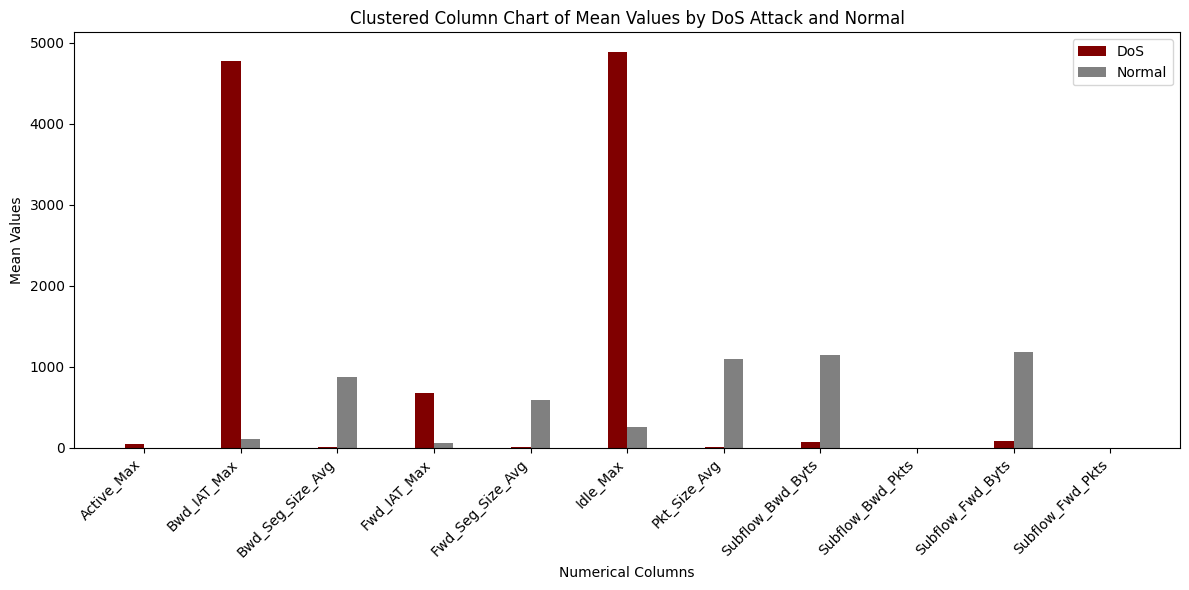

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Define the columns you want to compare
columns_to_compare = ['Active_Max', 'Bwd_IAT_Max', 'Bwd_Seg_Size_Avg', 'Fwd_IAT_Max', 'Fwd_Seg_Size_Avg', 'Idle_Max',
              'Pkt_Size_Avg', 'Subflow_Bwd_Byts', 'Subflow_Bwd_Pkts','Subflow_Fwd_Byts','Subflow_Fwd_Pkts']

# Define the attack types you want to compare
attack_types = ['DoS', 'Normal']

# Define custom colors for each attack type
colors = {'DoS': 'maroon', 'Normal': 'Grey'}

# Initialize lists to store the means for each column and attack type
means = {col: [] for col in columns_to_compare}

# Calculate means for each column and attack type
for col in columns_to_compare:
    for attack in attack_types:
        mean = statistics_dfs[attack].loc[col, 'Mean']
        means[col].append(mean)

# Convert the means to a NumPy array for plotting
mean_values = np.array([means[col] for col in columns_to_compare])

# Create a clustered column chart with custom colors
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # Width of each clustered column
x = np.arange(len(columns_to_compare))

for i, attack in enumerate(attack_types):
    ax.bar(x + width * i, mean_values[:, i], width, label=attack, color=colors[attack])

ax.set_xlabel('Numerical Columns')
ax.set_ylabel('Mean Values')
ax.set_title('Clustered Column Chart of Mean Values by DoS Attack and Normal')
ax.set_xticks(x + width * (len(attack_types) - 1) / 2)
ax.set_xticklabels(columns_to_compare, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

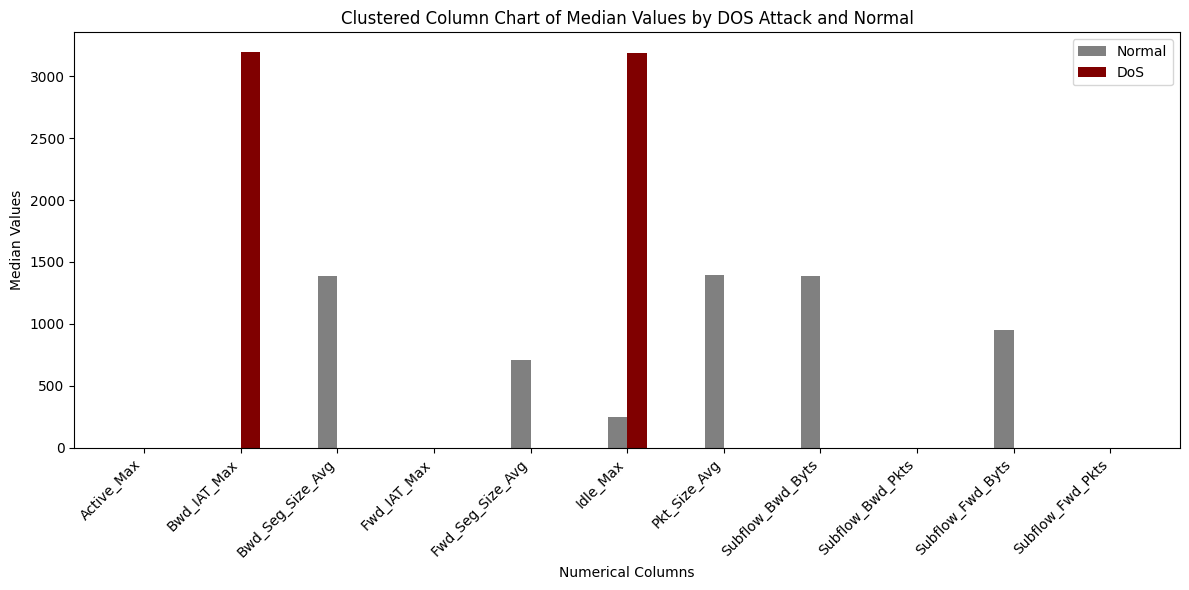

In [40]:
# Define the columns you want to compare
columns_to_compare = ['Active_Max', 'Bwd_IAT_Max', 'Bwd_Seg_Size_Avg', 'Fwd_IAT_Max', 'Fwd_Seg_Size_Avg', 'Idle_Max',
                     'Pkt_Size_Avg', 'Subflow_Bwd_Byts', 'Subflow_Bwd_Pkts','Subflow_Fwd_Byts','Subflow_Fwd_Pkts']

# Define the attack types you want to compare
attack_types = ['Normal', 'DoS']

colors = {'DoS': 'maroon', 'Normal': 'Grey'}
# Initialize lists to store the medians for each column and attack type
medians = {col: [] for col in columns_to_compare}

# Calculate medians for each column and attack type
for col in columns_to_compare:
    for attack in attack_types:
        median = statistics_dfs[attack].loc[col, 'Median']
        medians[col].append(median)

# Convert the medians to a NumPy array for plotting
median_values = np.array([medians[col] for col in columns_to_compare])

# Create a clustered column chart for medians
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # Width of each clustered column
x = np.arange(len(columns_to_compare))

for i, attack in enumerate(attack_types):
    ax.bar(x + width * i, median_values[:, i], width, label=attack ,color=colors[attack])

ax.set_xlabel('Numerical Columns')
ax.set_ylabel('Median Values')
ax.set_title('Clustered Column Chart of Median Values by DOS Attack and Normal')
ax.set_xticks(x + width * (len(attack_types) - 1) / 2)
ax.set_xticklabels(columns_to_compare, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()



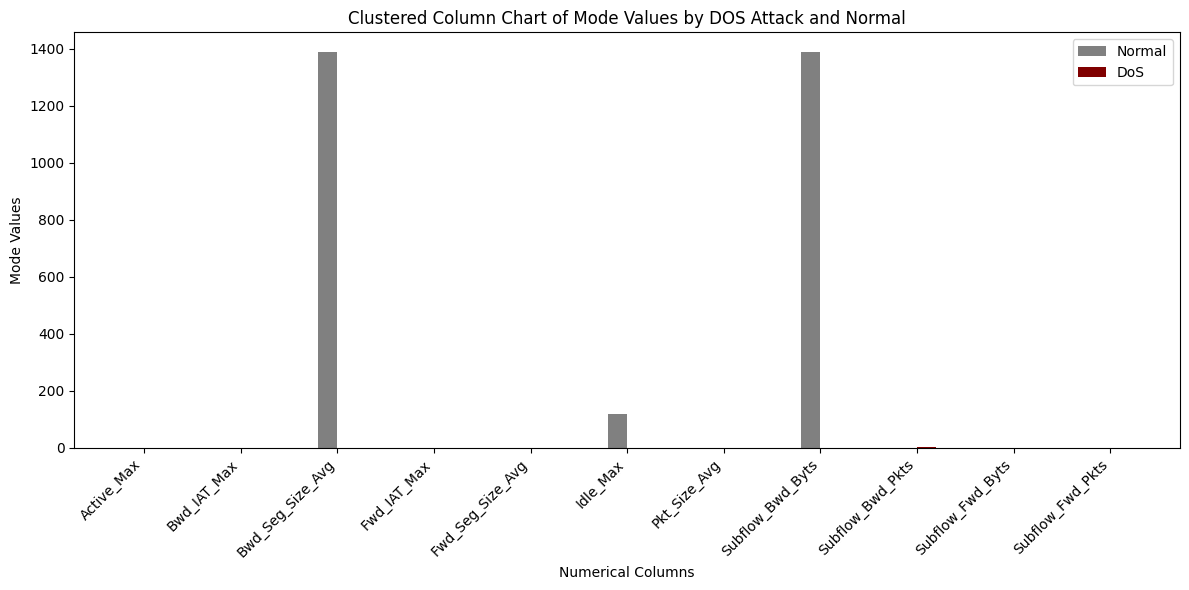

In [41]:
# Define the columns you want to compare
columns_to_compare = ['Active_Max', 'Bwd_IAT_Max', 'Bwd_Seg_Size_Avg', 'Fwd_IAT_Max', 'Fwd_Seg_Size_Avg', 'Idle_Max',
                     'Pkt_Size_Avg', 'Subflow_Bwd_Byts', 'Subflow_Bwd_Pkts','Subflow_Fwd_Byts','Subflow_Fwd_Pkts']

# Define the attack types you want to compare
attack_types = ['Normal', 'DoS']

colors = {'DoS': 'maroon', 'Normal': 'Grey'}
# Initialize lists to store the Mode for each column and attack type
mode = {col: [] for col in columns_to_compare}

# Calculate Mode for each column and attack type
for col in columns_to_compare:
    for attack in attack_types:
        mode_value = statistics_dfs[attack].loc[col, 'Mode']
        mode[col].append(mode_value)

# Convert the Mode to a NumPy array for plotting
mode_values = np.array([mode[col] for col in columns_to_compare])

# Create a clustered column chart for medians
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # Width of each clustered column
x = np.arange(len(columns_to_compare))

for i, attack in enumerate(attack_types):
    ax.bar(x + width * i, mode_values[:, i], width, label=attack ,color=colors[attack])

ax.set_xlabel('Numerical Columns')
ax.set_ylabel('Mode Values')
ax.set_title('Clustered Column Chart of Mode Values by DOS Attack and Normal')
ax.set_xticks(x + width * (len(attack_types) - 1) / 2)
ax.set_xticklabels(columns_to_compare, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


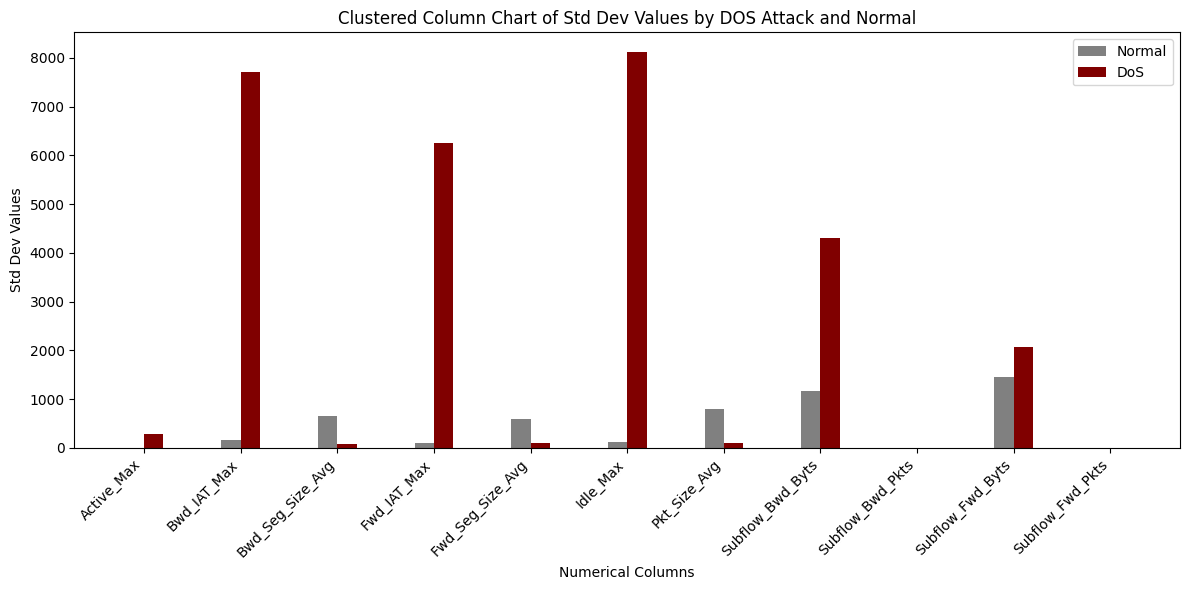

In [42]:
# Define the columns you want to compare
columns_to_compare = ['Active_Max', 'Bwd_IAT_Max', 'Bwd_Seg_Size_Avg', 'Fwd_IAT_Max', 'Fwd_Seg_Size_Avg', 'Idle_Max',
              'Pkt_Size_Avg', 'Subflow_Bwd_Byts', 'Subflow_Bwd_Pkts','Subflow_Fwd_Byts','Subflow_Fwd_Pkts']
# Define the attack types you want to compare
attack_types = ['Normal', 'DoS']

# Define custom colors for each attack type
colors = {'DoS': 'maroon', 'Normal': 'Grey'}

# Initialize lists to store the Std Dev values for each column and attack type
std_dev_values = {col: [] for col in columns_to_compare}

# Calculate Std Dev values for each column and attack type
for col in columns_to_compare:
    for attack in attack_types:
        std_dev = statistics_dfs[attack].loc[col, 'Standard Deviation']
        std_dev_values[col].append(std_dev)

# Convert the Std Dev values to a NumPy array for plotting
std_dev_array = np.array([std_dev_values[col] for col in columns_to_compare])

# Create a clustered column chart for Std Dev values with custom colors
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # Width of each clustered column
x = np.arange(len(columns_to_compare))

for i, attack in enumerate(attack_types):
    ax.bar(x + width * i, std_dev_array[:, i], width, label=attack, color=colors[attack])

ax.set_xlabel('Numerical Columns')
ax.set_ylabel('Std Dev Values')
ax.set_title('Clustered Column Chart of Std Dev Values by DOS Attack and Normal')
ax.set_xticks(x + width * (len(attack_types) - 1) / 2)
ax.set_xticklabels(columns_to_compare, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


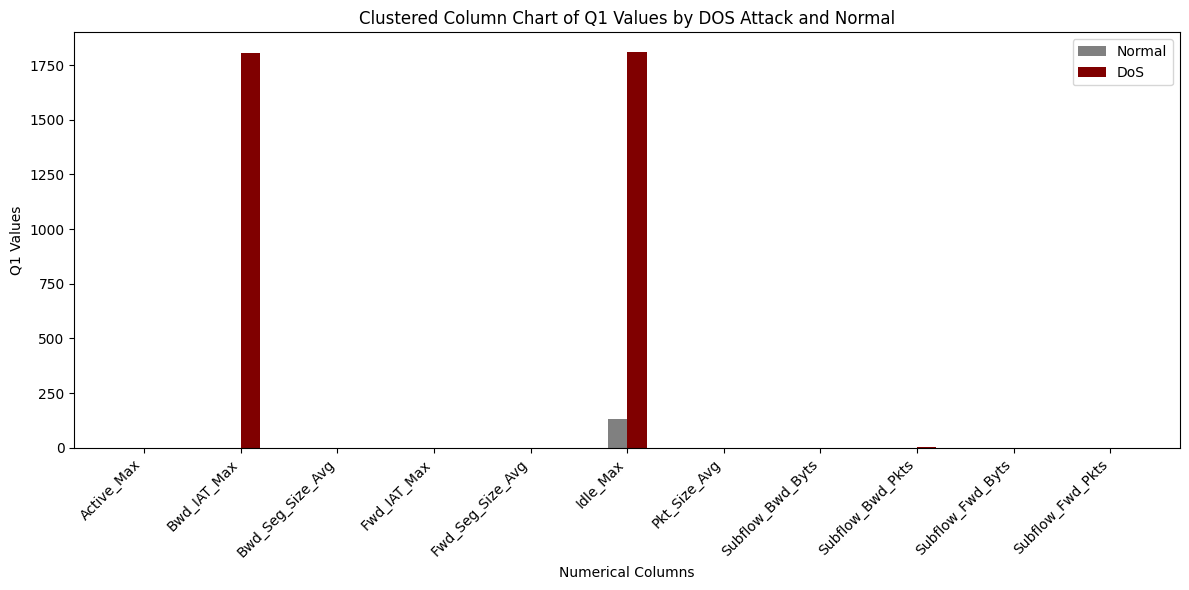

In [43]:
# Define the columns you want to compare
columns_to_compare = ['Active_Max', 'Bwd_IAT_Max', 'Bwd_Seg_Size_Avg', 'Fwd_IAT_Max', 'Fwd_Seg_Size_Avg', 'Idle_Max',
              'Pkt_Size_Avg', 'Subflow_Bwd_Byts', 'Subflow_Bwd_Pkts','Subflow_Fwd_Byts','Subflow_Fwd_Pkts']
# Define the attack types you want to compare
attack_types = ['Normal', 'DoS']

# Define custom colors for each attack type
colors = {'DoS': 'maroon', 'Normal': 'Grey'}

# Initialize lists to store the Q1 values for each column and attack type
q1_values = {col: [] for col in columns_to_compare}

# Calculate Q1 values for each column and attack type
for col in columns_to_compare:
    for attack in attack_types:
        q1 = statistics_dfs[attack].loc[col, 'Q1']
        q1_values[col].append(q1)

# Convert the Q1 values to a NumPy array for plotting
q1_array = np.array([q1_values[col] for col in columns_to_compare])

# Create a clustered column chart for Q1 values
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # Width of each clustered column
x = np.arange(len(columns_to_compare))

for i, attack in enumerate(attack_types):
    ax.bar(x + width * i, q1_array[:, i], width, label=attack ,color=colors[attack])

ax.set_xlabel('Numerical Columns')
ax.set_ylabel('Q1 Values')
ax.set_title('Clustered Column Chart of Q1 Values by DOS Attack and Normal')
ax.set_xticks(x + width * (len(attack_types) - 1) / 2)
ax.set_xticklabels(columns_to_compare, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


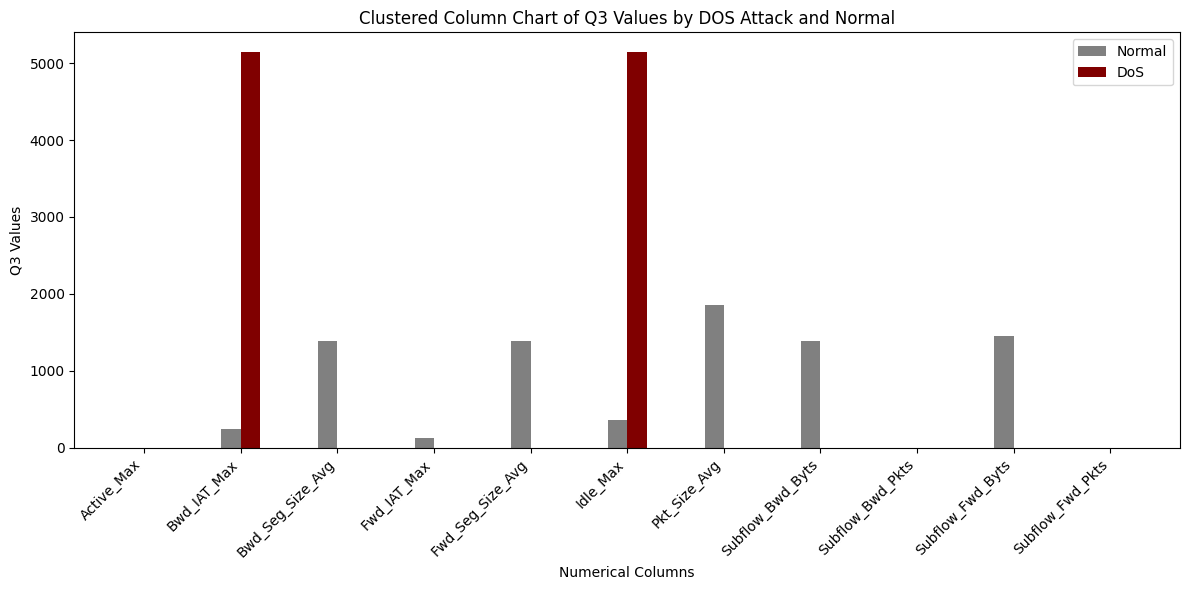

In [44]:
# Define the columns you want to compare
columns_to_compare = ['Active_Max', 'Bwd_IAT_Max', 'Bwd_Seg_Size_Avg', 'Fwd_IAT_Max', 'Fwd_Seg_Size_Avg', 'Idle_Max',
              'Pkt_Size_Avg', 'Subflow_Bwd_Byts', 'Subflow_Bwd_Pkts','Subflow_Fwd_Byts','Subflow_Fwd_Pkts']
# Define the attack types you want to compare
attack_types = ['Normal', 'DoS']

# Define custom colors for each attack type
colors = {'DoS': 'maroon', 'Normal': 'Grey'}

# Initialize lists to store the Q3 values for each column and attack type
q3_values = {col: [] for col in columns_to_compare}

# Calculate Q3 values for each column and attack type
for col in columns_to_compare:
    for attack in attack_types:
        q3 = statistics_dfs[attack].loc[col, 'Q3']
        q3_values[col].append(q3)

# Convert the Q3 values to a NumPy array for plotting
q3_array = np.array([q3_values[col] for col in columns_to_compare])

# Create a clustered column chart for Q3 values
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # Width of each clustered column
x = np.arange(len(columns_to_compare))

for i, attack in enumerate(attack_types):
    ax.bar(x + width * i, q3_array[:, i], width, label=attack ,color=colors[attack])

ax.set_xlabel('Numerical Columns')
ax.set_ylabel('Q3 Values')
ax.set_title('Clustered Column Chart of Q3 Values by DOS Attack and Normal')
ax.set_xticks(x + width * (len(attack_types) - 1) / 2)
ax.set_xticklabels(columns_to_compare, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

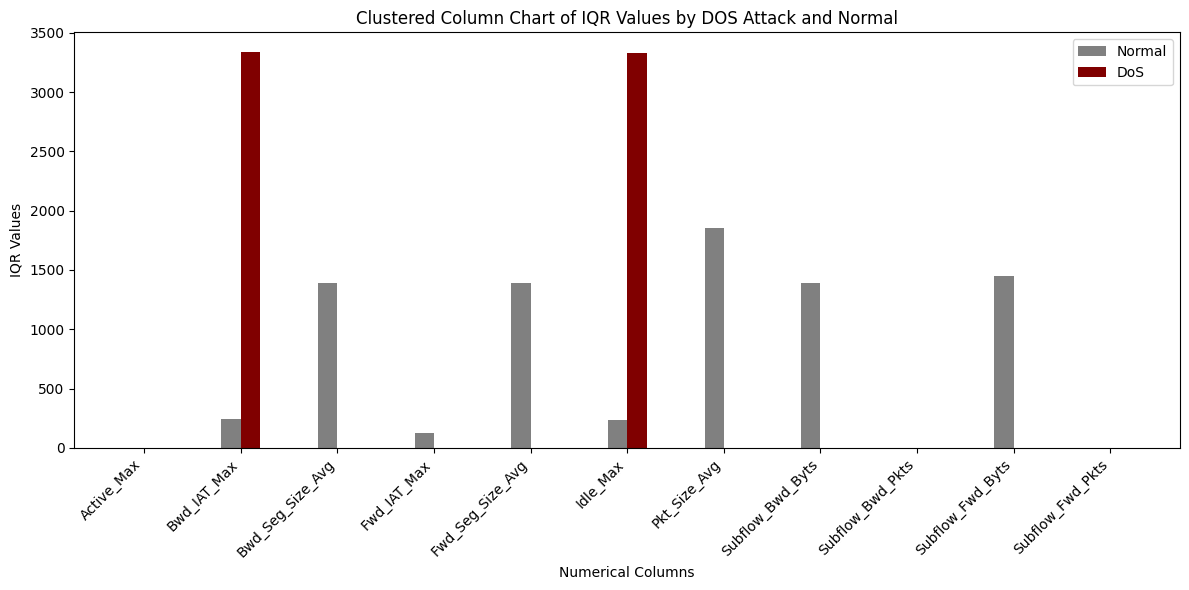

In [45]:
# Define the columns you want to compare
columns_to_compare = ['Active_Max', 'Bwd_IAT_Max', 'Bwd_Seg_Size_Avg', 'Fwd_IAT_Max', 'Fwd_Seg_Size_Avg', 'Idle_Max',
              'Pkt_Size_Avg', 'Subflow_Bwd_Byts', 'Subflow_Bwd_Pkts','Subflow_Fwd_Byts','Subflow_Fwd_Pkts']

# Define the attack types you want to compare
attack_types = ['Normal', 'DoS']

# Define custom colors for each attack type
colors = {'DoS': 'maroon', 'Normal': 'Grey'}

# Initialize lists to store the IQR values for each column and attack type
iqr_values = {col: [] for col in columns_to_compare}

# Calculate IQR values for each column and attack type
for col in columns_to_compare:
    for attack in attack_types:
        iqr = statistics_dfs[attack].loc[col, 'IQR']
        iqr_values[col].append(iqr)

# Convert the IQR values to a NumPy array for plotting
iqr_array = np.array([iqr_values[col] for col in columns_to_compare])

# Create a clustered column chart for IQR values with custom colors
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # Width of each clustered column
x = np.arange(len(columns_to_compare))

for i, attack in enumerate(attack_types):
    ax.bar(x + width * i, iqr_array[:, i], width, label=attack, color=colors[attack])

ax.set_xlabel('Numerical Columns')
ax.set_ylabel('IQR Values')
ax.set_title('Clustered Column Chart of IQR Values by DOS Attack and Normal')
ax.set_xticks(x + width * (len(attack_types) - 1) / 2)
ax.set_xticklabels(columns_to_compare, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


## **Features that most affect DoS Attack**

---



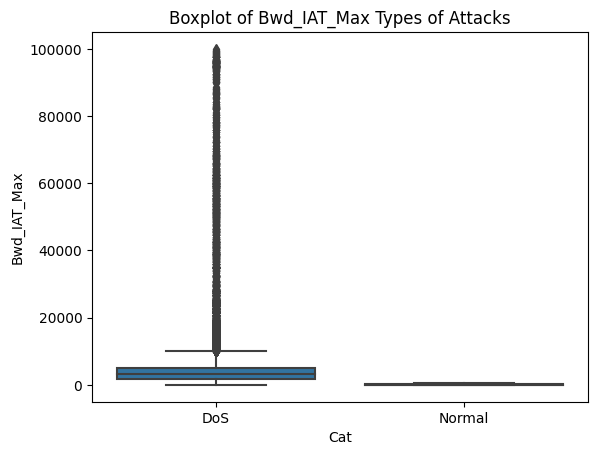

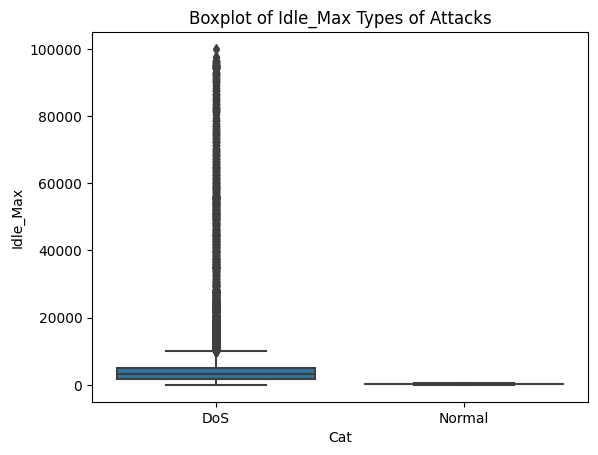

In [46]:
NumericalCols = [ 'Bwd_IAT_Max', 'Idle_Max']
for col in NumericalCols:
    sns.boxplot(x='Cat', y=col, data=pd.concat([Dos_Attack , Normal]))
    plt.title('Boxplot of ' + col + ' Types of Attacks')
    plt.show ()

In [47]:

# Define the columns you want to compute statistics for
NumericalCols = [ 'Bwd_IAT_Max', 'Idle_Max']

# Define a list with all your dataframes and corresponding risk levels
dataframes = [
    ('Mirai', Mirai_Attack),
    ('DoS', Dos_Attack),
    ('Scan', Scan_Attack),
    ('Normal', Normal),
    ('MITM ARP Spoofing', MITM_ARP_Spoofing_Attack)
]

# Initialize a dictionary to store the resulting DataFrames for each risk level
statistics_dfs = {}

# Loop through all the dataframes and risk levels
for attack, df in dataframes:
    results = {}
    for col in NumericalCols:
        mean = df[col].mean()
        median = df[col].median()
        std_dev = df[col].std()
        min_val = df[col].min()
        max_val = df[col].max()
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        data_range = max_val - min_val
        mode = df[col].mode()[0]  # Taking the first mode value if there are multiple

        # Store the statistics in a dictionary
        results[col] = {
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Min': min_val,
            'Max': max_val,
            'Q1': q1,
            'Q3': q3,
            'IQR': iqr,
            'Range': data_range
        }

    # Convert the results dictionary to a DataFrame and store in the dictionary
    statistics_dfs[attack] = pd.DataFrame(results).transpose()

# Now, statistics_dfs will contain each statistics DataFrame, keyed by the attack names
# For example, to view the statistics DataFrame for 'Mirai', you can do:
print("Statistics for Dos Attack")
statistics_dfs['DoS']

Statistics for Dos Attack


,Mean,Median,Mode,Standard Deviation,Min,Max,Q1,Q3,IQR,Range
Bwd_IAT_Max,4782.184745,3194.0,0.0,7705.138871,0.0,99973.0,1806.0,5142.75,3336.75,99973.0
Idle_Max,4885.783802,3187.0,0.0,8115.454192,0.0,99973.0,1809.0,5139.75,3330.75,99973.0


In [48]:
# Define the columns you want to compute statistics for
NumericalCols = [ 'Bwd_IAT_Max', 'Idle_Max']

# Define a list with all your dataframes and corresponding risk levels
dataframes = [
    ('Mirai', Mirai_Attack),
    ('DoS', Dos_Attack),
    ('Scan', Scan_Attack),
    ('Normal', Normal),
    ('MITM ARP Spoofing', MITM_ARP_Spoofing_Attack)
]

# Initialize a dictionary to store the resulting DataFrames for each risk level
statistics_dfs = {}

# Loop through all the dataframes and risk levels
for attack, df in dataframes:
    results = {}
    for col in NumericalCols:
        mean = df[col].mean()
        median = df[col].median()
        std_dev = df[col].std()
        min_val = df[col].min()
        max_val = df[col].max()
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        data_range = max_val - min_val
        mode = df[col].mode()[0]  # Taking the first mode value if there are multiple

        # Store the statistics in a dictionary
        results[col] = {
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Min': min_val,
            'Max': max_val,
            'Q1': q1,
            'Q3': q3,
            'IQR': iqr,
            'Range': data_range
        }

    # Convert the results dictionary to a DataFrame and store in the dictionary
    statistics_dfs[attack] = pd.DataFrame(results).transpose()

# Now, statistics_dfs will contain each statistics DataFrame, keyed by the attack names
# For example, to view the statistics DataFrame for 'Mirai', you can do:
print("Statistics for Normal")
statistics_dfs['Normal']

Statistics for Normal


,Mean,Median,Mode,Standard Deviation,Min,Max,Q1,Q3,IQR,Range
Bwd_IAT_Max,111.710840,0.0,0.0,163.220378,0.0,550.0,0.0,239.0,239.0,550.0
Idle_Max,253.506322,249.0,119.0,128.158194,0.0,550.0,132.0,363.0,231.0,550.0


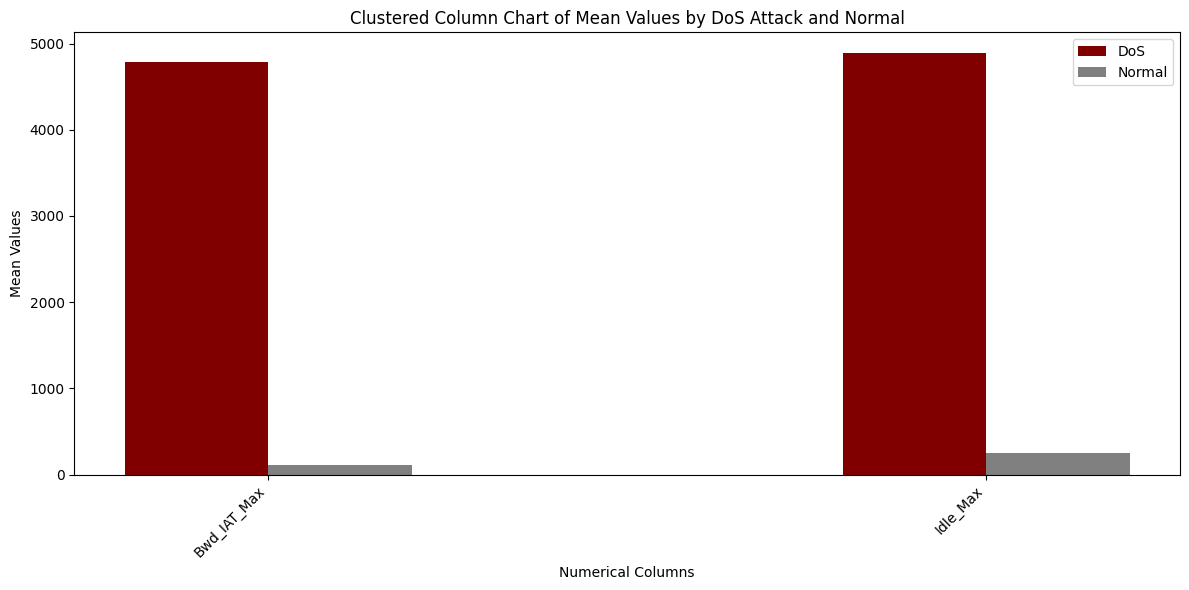

In [49]:
# Define the columns you want to compare
columns_to_compare = [ 'Bwd_IAT_Max', 'Idle_Max']

# Define the attack types you want to compare
attack_types = ['DoS', 'Normal']

# Define custom colors for each attack type
colors = {'DoS': 'maroon', 'Normal': 'Grey'}

# Initialize lists to store the means for each column and attack type
means = {col: [] for col in columns_to_compare}

# Calculate means for each column and attack type
for col in columns_to_compare:
    for attack in attack_types:
        mean = statistics_dfs[attack].loc[col, 'Mean']
        means[col].append(mean)

# Convert the means to a NumPy array for plotting
mean_values = np.array([means[col] for col in columns_to_compare])

# Create a clustered column chart with custom colors
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # Width of each clustered column
x = np.arange(len(columns_to_compare))

for i, attack in enumerate(attack_types):
    ax.bar(x + width * i, mean_values[:, i], width, label=attack, color=colors[attack])

ax.set_xlabel('Numerical Columns')
ax.set_ylabel('Mean Values')
ax.set_title('Clustered Column Chart of Mean Values by DoS Attack and Normal')
ax.set_xticks(x + width * (len(attack_types) - 1) / 2)
ax.set_xticklabels(columns_to_compare, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

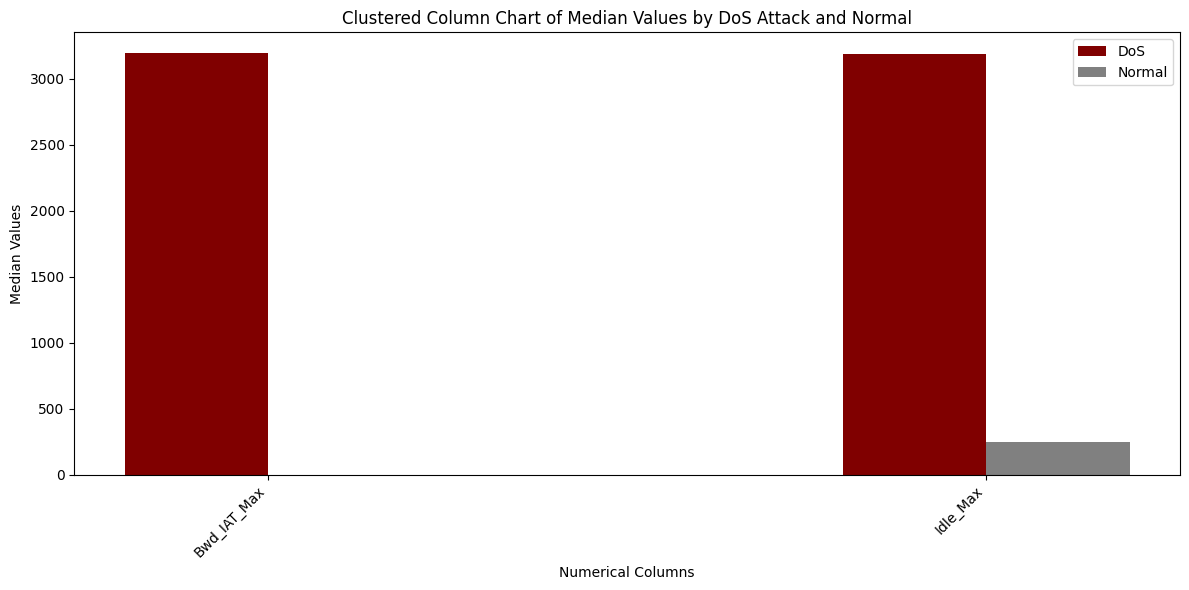

In [50]:
# Define the columns you want to compare
columns_to_compare = [ 'Bwd_IAT_Max', 'Idle_Max']

# Define the attack types you want to compare
attack_types = ['DoS', 'Normal']

# Define custom colors for each attack type
colors = {'DoS': 'maroon', 'Normal': 'Grey'}

# Initialize lists to store the median for each column and attack type
medians = {col: [] for col in columns_to_compare}

# Calculate medians for each column and attack type
for col in columns_to_compare:
    for attack in attack_types:
        median = statistics_dfs[attack].loc[col, 'Median']
        medians [col].append(median)

# Convert the median to a NumPy array for plotting
median_values = np.array([medians[col] for col in columns_to_compare])

# Create a clustered column chart with custom colors
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # Width of each clustered column
x = np.arange(len(columns_to_compare))

for i, attack in enumerate(attack_types):
    ax.bar(x + width * i, median_values[:, i], width, label=attack, color=colors[attack])

ax.set_xlabel('Numerical Columns')
ax.set_ylabel('Median Values')
ax.set_title('Clustered Column Chart of Median Values by DoS Attack and Normal')
ax.set_xticks(x + width * (len(attack_types) - 1) / 2)
ax.set_xticklabels(columns_to_compare, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

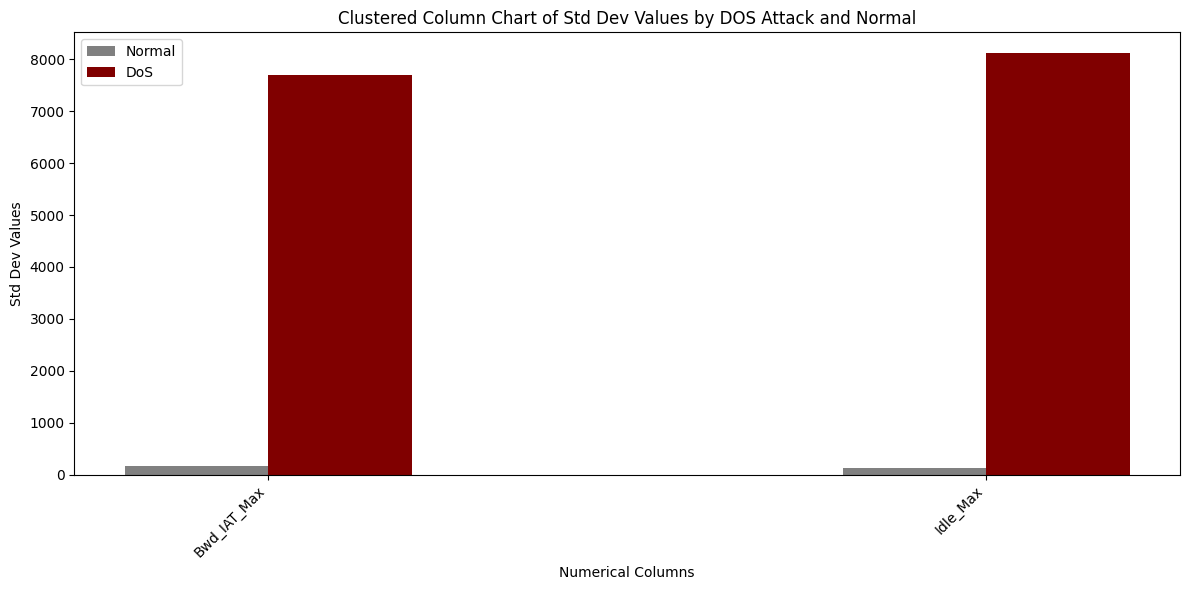

In [51]:
# Define the columns you want to compare
columns_to_compare = [ 'Bwd_IAT_Max', 'Idle_Max']

# Define the attack types you want to compare
attack_types = ['Normal', 'DoS']

# Define custom colors for each attack type
colors = {'DoS': 'maroon', 'Normal': 'Grey'}

# Initialize lists to store the Std Dev values for each column and attack type
std_dev_values = {col: [] for col in columns_to_compare}

# Calculate Std Dev values for each column and attack type
for col in columns_to_compare:
    for attack in attack_types:
        std_dev = statistics_dfs[attack].loc[col, 'Standard Deviation']
        std_dev_values[col].append(std_dev)

# Convert the Std Dev values to a NumPy array for plotting
std_dev_array = np.array([std_dev_values[col] for col in columns_to_compare])

# Create a clustered column chart for Std Dev values with custom colors
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # Width of each clustered column
x = np.arange(len(columns_to_compare))

for i, attack in enumerate(attack_types):
    ax.bar(x + width * i, std_dev_array[:, i], width, label=attack, color=colors[attack])

ax.set_xlabel('Numerical Columns')
ax.set_ylabel('Std Dev Values')
ax.set_title('Clustered Column Chart of Std Dev Values by DOS Attack and Normal')
ax.set_xticks(x + width * (len(attack_types) - 1) / 2)
ax.set_xticklabels(columns_to_compare, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

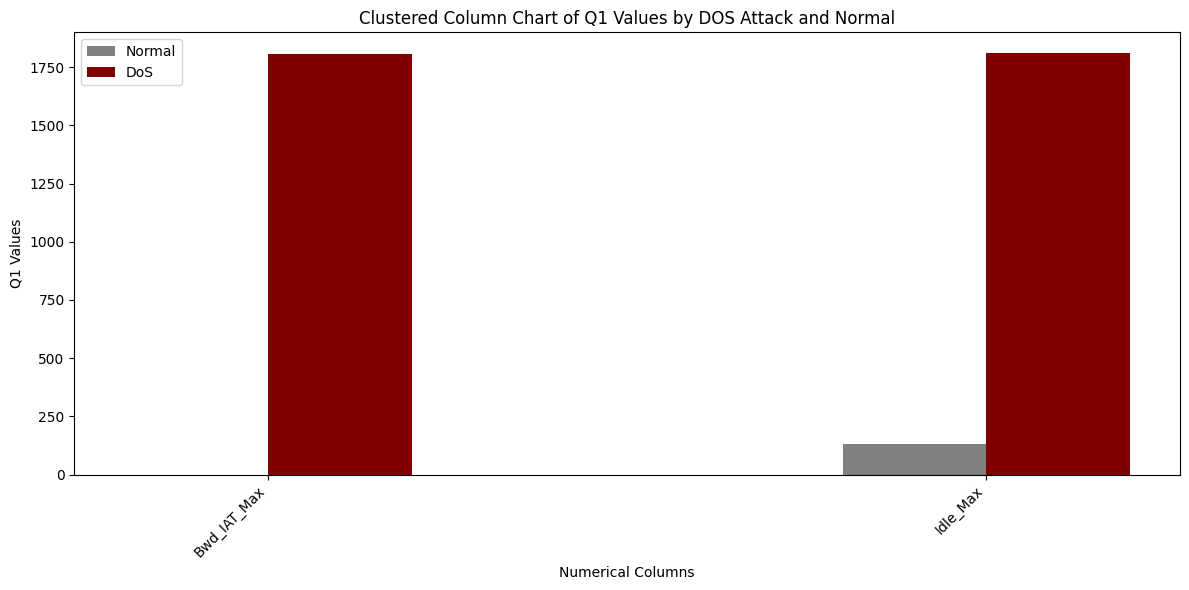

In [52]:
# Define the columns you want to compare
columns_to_compare = [ 'Bwd_IAT_Max', 'Idle_Max']

# Define the attack types you want to compare
attack_types = ['Normal', 'DoS']

# Define custom colors for each attack type
colors = {'DoS': 'maroon', 'Normal': 'Grey'}

# Initialize lists to store the Q1 values for each column and attack type
q1_values = {col: [] for col in columns_to_compare}

# Calculate Q1 values for each column and attack type
for col in columns_to_compare:
    for attack in attack_types:
        q1 = statistics_dfs[attack].loc[col, 'Q1']
        q1_values[col].append(q1)

# Convert the Q1 values to a NumPy array for plotting
q1_array = np.array([q1_values[col] for col in columns_to_compare])

# Create a clustered column chart for Q1 values
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # Width of each clustered column
x = np.arange(len(columns_to_compare))

for i, attack in enumerate(attack_types):
    ax.bar(x + width * i, q1_array[:, i], width, label=attack ,color=colors[attack])

ax.set_xlabel('Numerical Columns')
ax.set_ylabel('Q1 Values')
ax.set_title('Clustered Column Chart of Q1 Values by DOS Attack and Normal')
ax.set_xticks(x + width * (len(attack_types) - 1) / 2)
ax.set_xticklabels(columns_to_compare, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

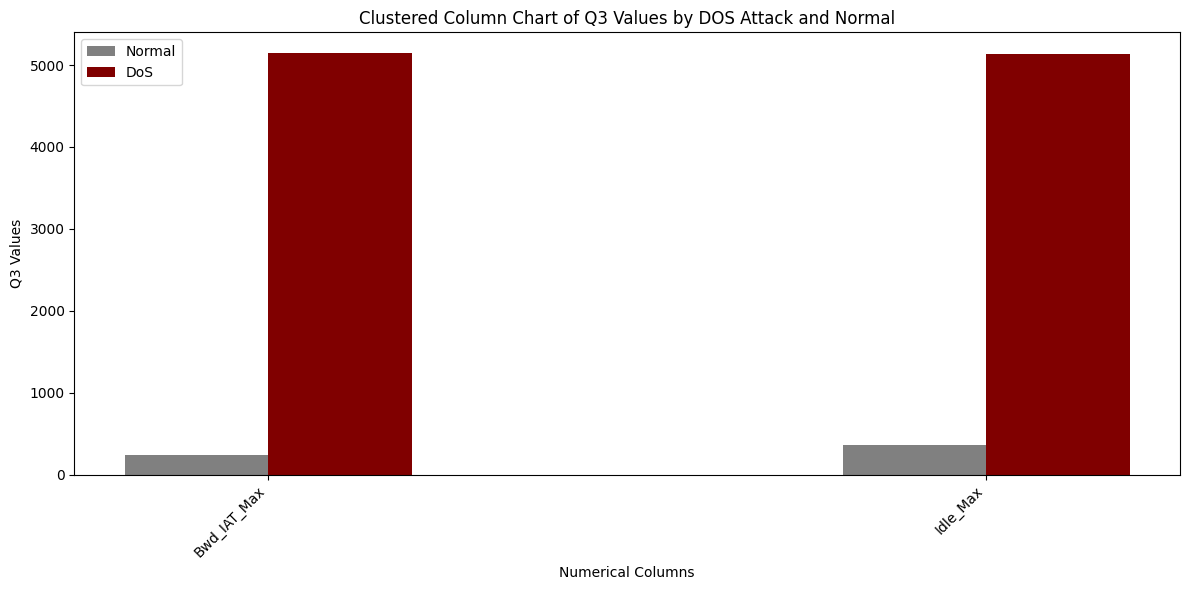

In [53]:
# Define the columns you want to compare
columns_to_compare = [ 'Bwd_IAT_Max', 'Idle_Max']

# Define the attack types you want to compare
attack_types = ['Normal', 'DoS']

# Define custom colors for each attack type
colors = {'DoS': 'maroon', 'Normal': 'Grey'}

# Initialize lists to store the Q3 values for each column and attack type
q3_values = {col: [] for col in columns_to_compare}

# Calculate Q3 values for each column and attack type
for col in columns_to_compare:
    for attack in attack_types:
        q3 = statistics_dfs[attack].loc[col, 'Q3']
        q3_values[col].append(q3)

# Convert the Q3 values to a NumPy array for plotting
q3_array = np.array([q3_values[col] for col in columns_to_compare])

# Create a clustered column chart for Q3 values
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # Width of each clustered column
x = np.arange(len(columns_to_compare))

for i, attack in enumerate(attack_types):
    ax.bar(x + width * i, q3_array[:, i], width, label=attack ,color=colors[attack])

ax.set_xlabel('Numerical Columns')
ax.set_ylabel('Q3 Values')
ax.set_title('Clustered Column Chart of Q3 Values by DOS Attack and Normal')
ax.set_xticks(x + width * (len(attack_types) - 1) / 2)
ax.set_xticklabels(columns_to_compare, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

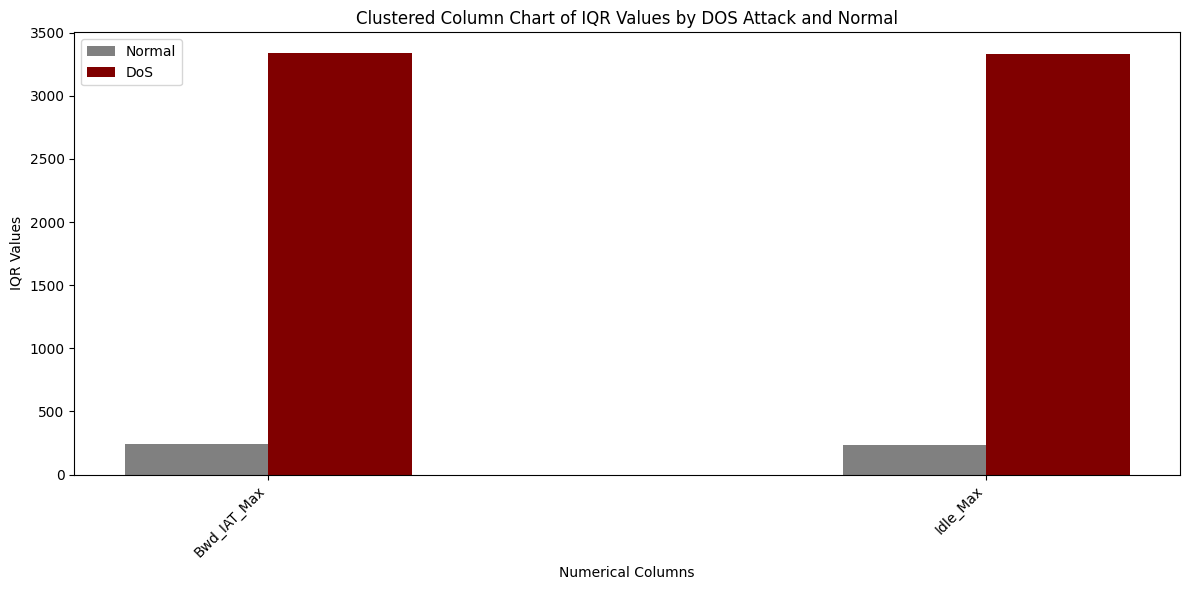

In [54]:
# Define the columns you want to compare
columns_to_compare = [ 'Bwd_IAT_Max', 'Idle_Max']

# Define the attack types you want to compare
attack_types = ['Normal', 'DoS']

# Define custom colors for each attack type
colors = {'DoS': 'maroon', 'Normal': 'Grey'}

# Initialize lists to store the IQR values for each column and attack type
iqr_values = {col: [] for col in columns_to_compare}

# Calculate IQR values for each column and attack type
for col in columns_to_compare:
    for attack in attack_types:
        iqr = statistics_dfs[attack].loc[col, 'IQR']
        iqr_values[col].append(iqr)

# Convert the IQR values to a NumPy array for plotting
iqr_array = np.array([iqr_values[col] for col in columns_to_compare])

# Create a clustered column chart for IQR values with custom colors
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # Width of each clustered column
x = np.arange(len(columns_to_compare))

for i, attack in enumerate(attack_types):
    ax.bar(x + width * i, iqr_array[:, i], width, label=attack, color=colors[attack])

ax.set_xlabel('Numerical Columns')
ax.set_ylabel('IQR Values')
ax.set_title('Clustered Column Chart of IQR Values by DOS Attack and Normal')
ax.set_xticks(x + width * (len(attack_types) - 1) / 2)
ax.set_xticklabels(columns_to_compare, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()
